## Define statistical metrics for wind speed and direction at different stations to evalute the performace of the different models
## Apply them on icon_d2, icon_eu, era5

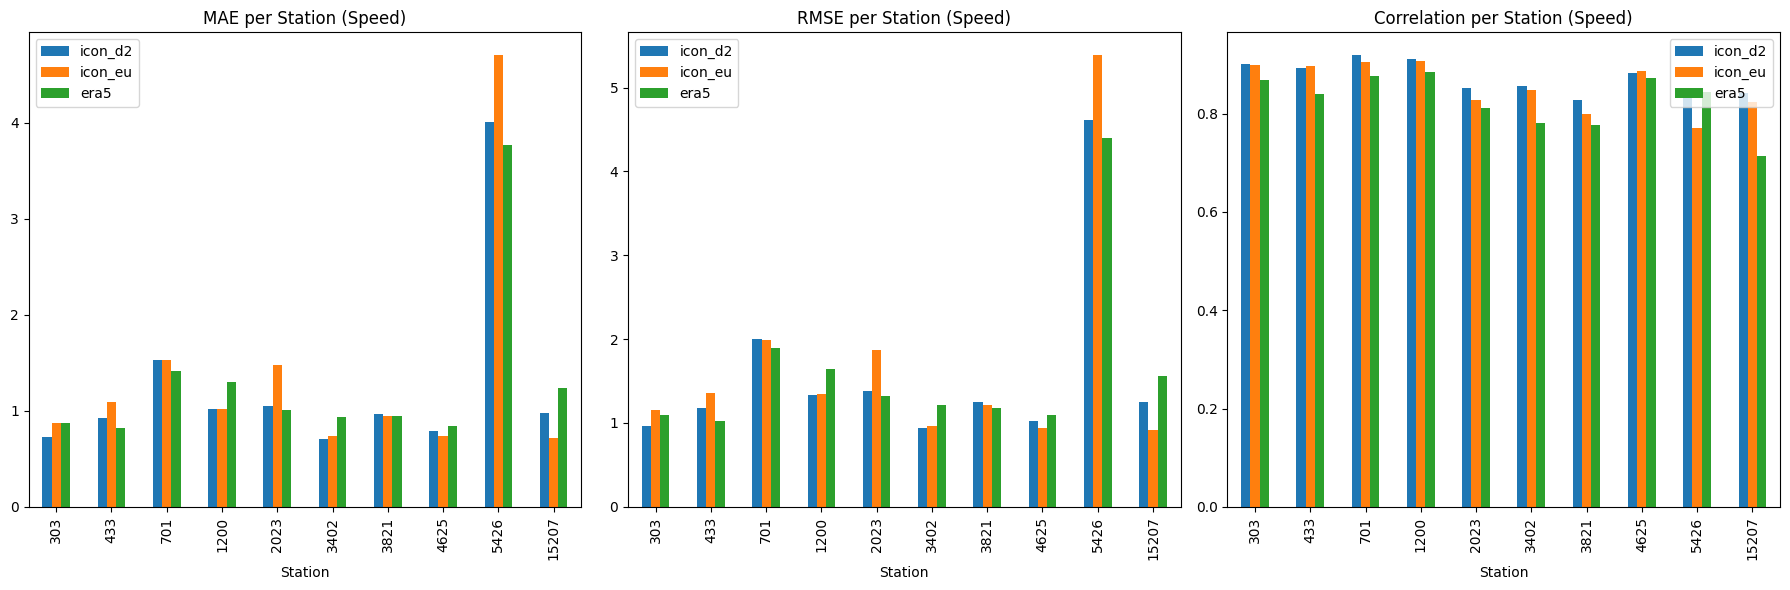

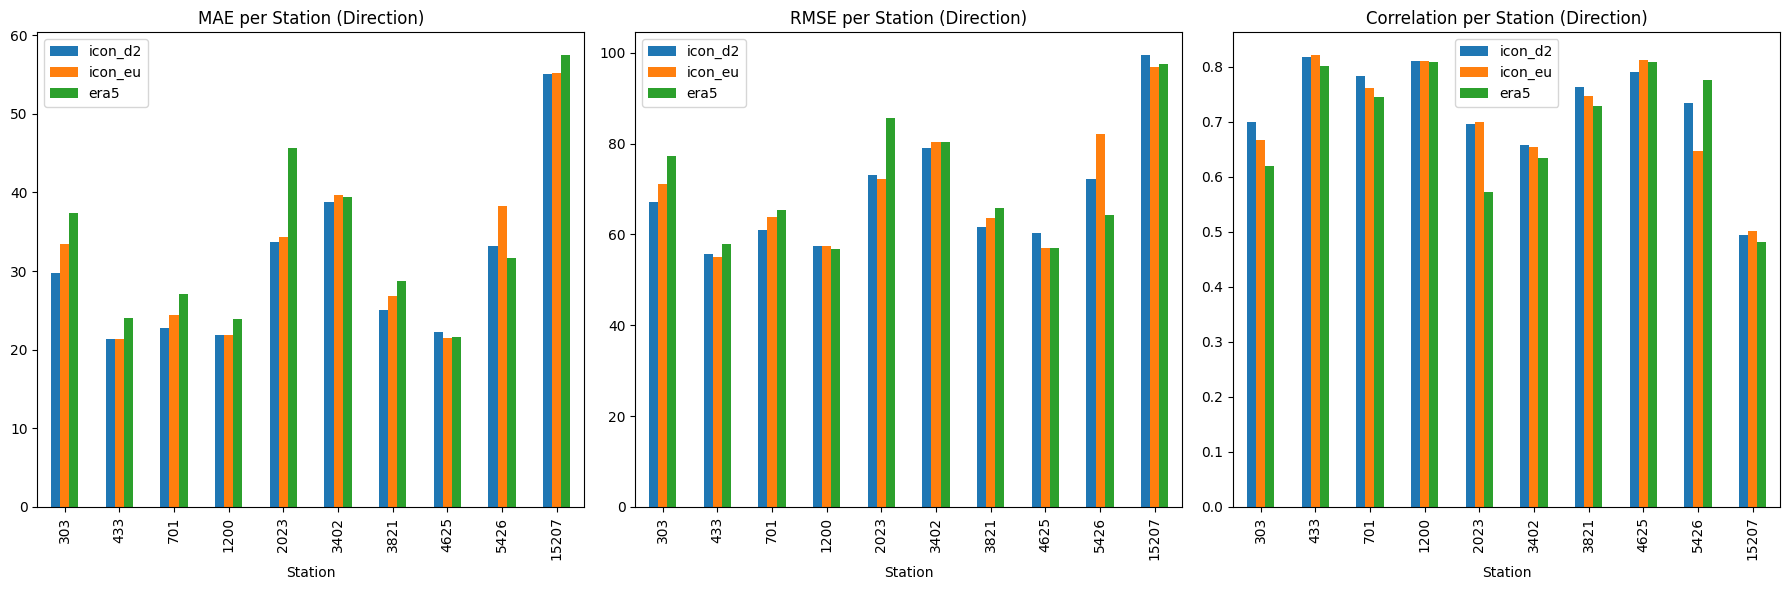


Summary of Wind Speed Model Performance Metrics:
      Model       MAE      RMSE  Correlation
0  icon_d2  1.269241  1.593928     0.872167
1  icon_eu  1.383006  1.714995     0.856497
2     era5  1.312961  1.643351     0.826835

Summary of Wind Direction Model Performance Metrics:
      Model        MAE       RMSE  Correlation
0  icon_d2  30.366585  68.704449     0.724501
1  icon_eu  31.703756  69.901813     0.712176
2     era5  33.689825  70.752702     0.697345


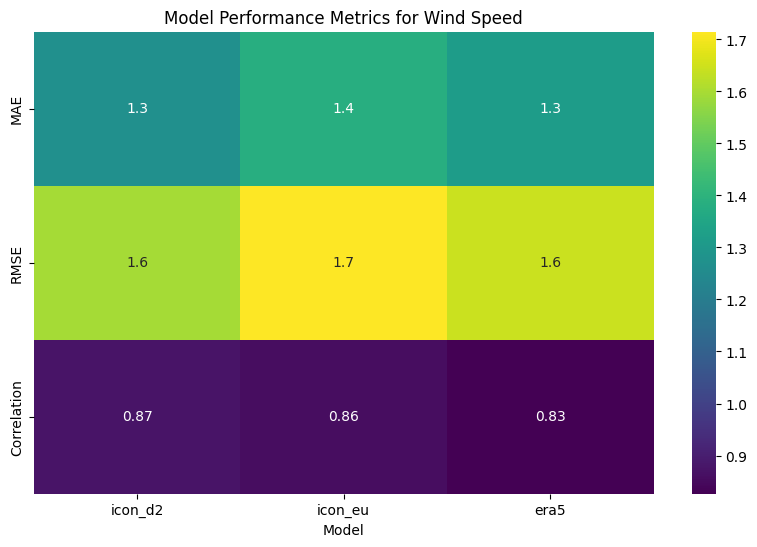

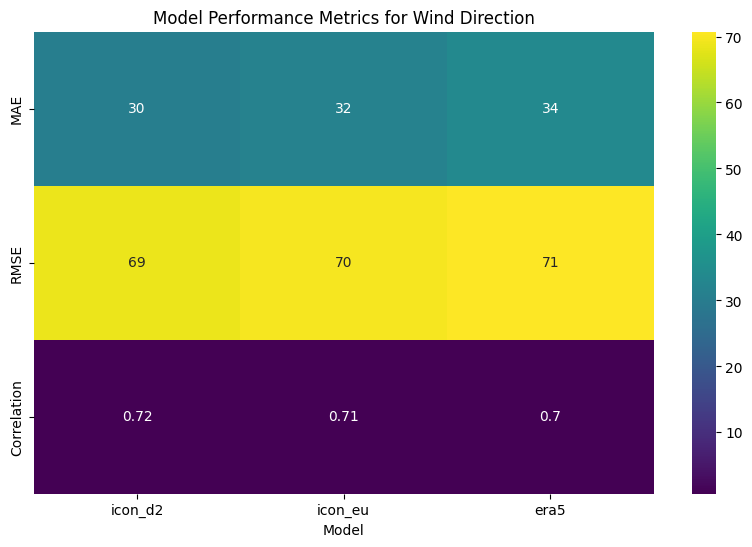

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

wind_data = xr.open_dataset("wind_2023.nc")


# Function to evaluate models
def evaluate_model(y_true, y_pred):
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    correlation = np.corrcoef(y_true, y_pred)[0, 1]
    return mae, rmse, correlation

# Open the dataset
wind_data = xr.open_dataset("wind_2023.nc")

# Initialize lists to store metrics for each station
mae_per_station_speed = []
rmse_per_station_speed = []
corr_per_station_speed = []

mae_per_station_direction = []
rmse_per_station_direction = []
corr_per_station_direction = []

# Iterate over each station
station_ids = np.unique(wind_data['station_id'].values)

for station_id in station_ids:
    # Filter data for the current station
    station_data = wind_data.sel(station_id=station_id)

    # Wind Speed Evaluation
    y_true_speed = station_data['measured_wind_speed'].values
    y_pred_icon_d2_speed = station_data['icon_d2_wind_speed'].values
    y_pred_icon_eu_speed = station_data['icon_eu_wind_speed'].values
    y_pred_era5_speed = station_data['era5_wind_speed'].values

    mae_icon_d2_speed, rmse_icon_d2_speed, corr_icon_d2_speed = evaluate_model(y_true_speed, y_pred_icon_d2_speed)
    mae_icon_eu_speed, rmse_icon_eu_speed, corr_icon_eu_speed = evaluate_model(y_true_speed, y_pred_icon_eu_speed)
    mae_era5_speed, rmse_era5_speed, corr_era5_speed = evaluate_model(y_true_speed, y_pred_era5_speed)

    mae_per_station_speed.append({'Station': station_id, 'icon_d2': mae_icon_d2_speed, 'icon_eu': mae_icon_eu_speed, 'era5': mae_era5_speed})
    rmse_per_station_speed.append({'Station': station_id, 'icon_d2': rmse_icon_d2_speed, 'icon_eu': rmse_icon_eu_speed, 'era5': rmse_era5_speed})
    corr_per_station_speed.append({'Station': station_id, 'icon_d2': corr_icon_d2_speed, 'icon_eu': corr_icon_eu_speed, 'era5': corr_era5_speed})

    # Wind Direction Evaluation
    y_true_direction = station_data['measured_wind_direction'].values
    y_pred_icon_d2_direction = station_data['icon_d2_wind_direction'].values
    y_pred_icon_eu_direction = station_data['icon_eu_wind_direction'].values
    y_pred_era5_direction = station_data['era5_wind_direction'].values

    mae_icon_d2_direction, rmse_icon_d2_direction, corr_icon_d2_direction = evaluate_model(y_true_direction, y_pred_icon_d2_direction)
    mae_icon_eu_direction, rmse_icon_eu_direction, corr_icon_eu_direction = evaluate_model(y_true_direction, y_pred_icon_eu_direction)
    mae_era5_direction, rmse_era5_direction, corr_era5_direction = evaluate_model(y_true_direction, y_pred_era5_direction)

    mae_per_station_direction.append({'Station': station_id, 'icon_d2': mae_icon_d2_direction, 'icon_eu': mae_icon_eu_direction, 'era5': mae_era5_direction})
    rmse_per_station_direction.append({'Station': station_id, 'icon_d2': rmse_icon_d2_direction, 'icon_eu': rmse_icon_eu_direction, 'era5': rmse_era5_direction})
    corr_per_station_direction.append({'Station': station_id, 'icon_d2': corr_icon_d2_direction, 'icon_eu': corr_icon_eu_direction, 'era5': corr_era5_direction})

# Convert to DataFrames
mae_per_station_df_speed = pd.DataFrame(mae_per_station_speed).set_index('Station')
rmse_per_station_df_speed = pd.DataFrame(rmse_per_station_speed).set_index('Station')
corr_per_station_df_speed = pd.DataFrame(corr_per_station_speed).set_index('Station')

mae_per_station_df_direction = pd.DataFrame(mae_per_station_direction).set_index('Station')
rmse_per_station_df_direction = pd.DataFrame(rmse_per_station_direction).set_index('Station')
corr_per_station_df_direction = pd.DataFrame(corr_per_station_direction).set_index('Station')

# Plot MAE, RMSE, and Correlation for each station (Speed)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
mae_per_station_df_speed.plot(kind='bar', ax=plt.gca())
plt.title('MAE per Station (Speed)')

plt.subplot(1, 3, 2)
rmse_per_station_df_speed.plot(kind='bar', ax=plt.gca())
plt.title('RMSE per Station (Speed)')

plt.subplot(1, 3, 3)
corr_per_station_df_speed.plot(kind='bar', ax=plt.gca())
plt.title('Correlation per Station (Speed)')

plt.tight_layout()
plt.show()

# Plot MAE, RMSE, and Correlation for each station (Direction)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
mae_per_station_df_direction.plot(kind='bar', ax=plt.gca())
plt.title('MAE per Station (Direction)')

plt.subplot(1, 3, 2)
rmse_per_station_df_direction.plot(kind='bar', ax=plt.gca())
plt.title('RMSE per Station (Direction)')

plt.subplot(1, 3, 3)
corr_per_station_df_direction.plot(kind='bar', ax=plt.gca())
plt.title('Correlation per Station (Direction)')

plt.tight_layout()
plt.show()

# Summary of model performance metrics
metrics_speed = {
    'Model': ['icon_d2', 'icon_eu', 'era5'],
    'MAE': [
        np.mean([res['icon_d2'] for res in mae_per_station_speed]),
        np.mean([res['icon_eu'] for res in mae_per_station_speed]),
        np.mean([res['era5'] for res in mae_per_station_speed])
    ],
    'RMSE': [
        np.mean([res['icon_d2'] for res in rmse_per_station_speed]),
        np.mean([res['icon_eu'] for res in rmse_per_station_speed]),
        np.mean([res['era5'] for res in rmse_per_station_speed])
    ],
    'Correlation': [
        np.mean([res['icon_d2'] for res in corr_per_station_speed]),
        np.mean([res['icon_eu'] for res in corr_per_station_speed]),
        np.mean([res['era5'] for res in corr_per_station_speed])
    ]
}

metrics_direction = {
    'Model': ['icon_d2', 'icon_eu', 'era5'],
    'MAE': [
        np.mean([res['icon_d2'] for res in mae_per_station_direction]),
        np.mean([res['icon_eu'] for res in mae_per_station_direction]),
        np.mean([res['era5'] for res in mae_per_station_direction])
    ],
    'RMSE': [
        np.mean([res['icon_d2'] for res in rmse_per_station_direction]),
        np.mean([res['icon_eu'] for res in rmse_per_station_direction]),
        np.mean([res['era5'] for res in rmse_per_station_direction])
    ],
    'Correlation': [
        np.mean([res['icon_d2'] for res in corr_per_station_direction]),
        np.mean([res['icon_eu'] for res in corr_per_station_direction]),
        np.mean([res['era5'] for res in corr_per_station_direction])
    ]
}

metrics_df_speed = pd.DataFrame(metrics_speed)
metrics_df_direction = pd.DataFrame(metrics_direction)

print("\nSummary of Wind Speed Model Performance Metrics:\n", metrics_df_speed)
print("\nSummary of Wind Direction Model Performance Metrics:\n", metrics_df_direction)

# Plot heatmap for wind speed metrics
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df_speed.set_index('Model').T, annot=True, cmap='viridis')
plt.title('Model Performance Metrics for Wind Speed')
plt.show()

# Plot heatmap for wind direction metrics
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df_direction.set_index('Model').T, annot=True, cmap='viridis')
plt.title('Model Performance Metrics for Wind Direction')
plt.show()


You talked about time series forecasting :) Apply a model you have in mind to the dataset.
Which model is the best? Can you explain differences between stations?

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/onq1v9xf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/nug9s0nm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42721', 'data', 'file=/tmp/tmppjajatdi/onq1v9xf.json', 'init=/tmp/tmppjajatdi/nug9s0nm.json', 'output', 'file=/tmp/tmppjajatdi/prophet_modeli37w8ym4/prophet_model-20240722105156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:51:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:51:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

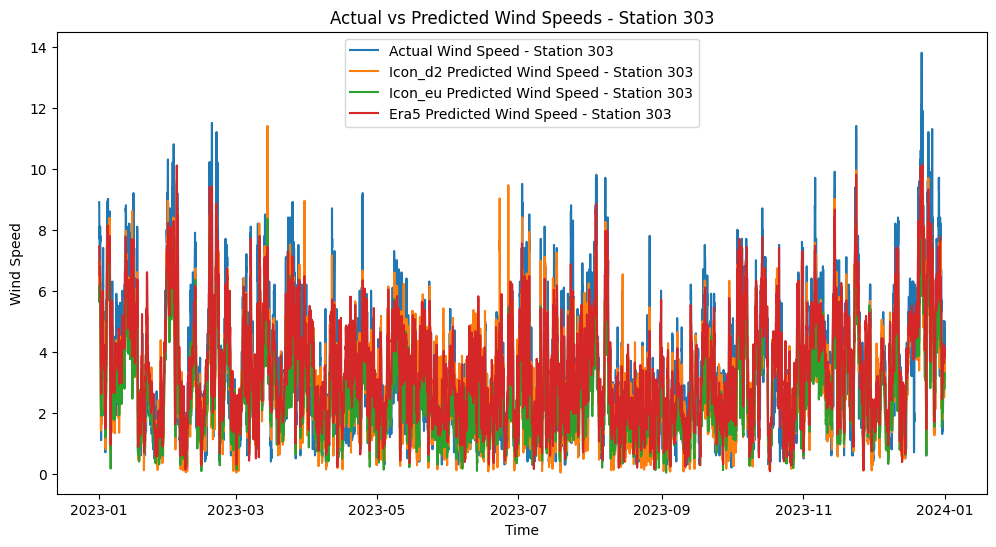

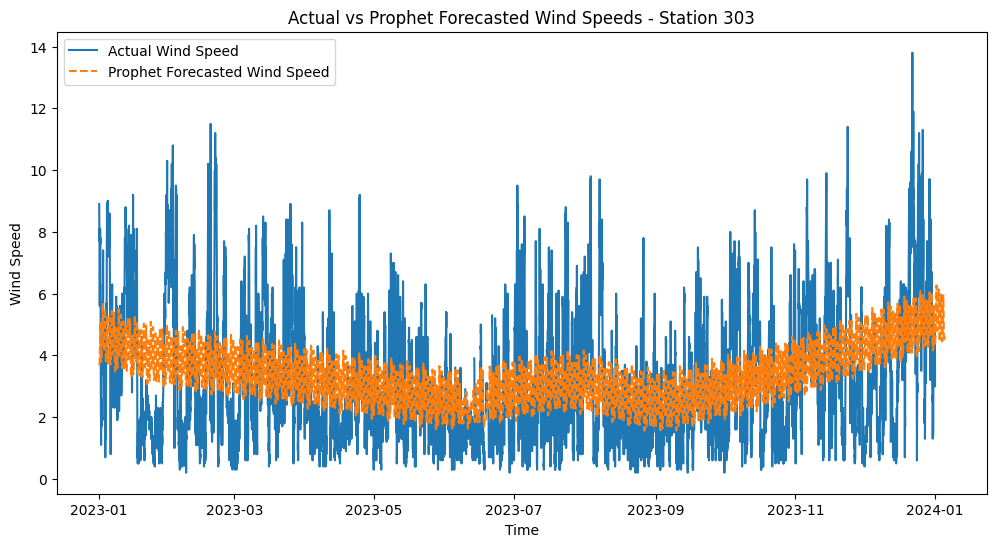

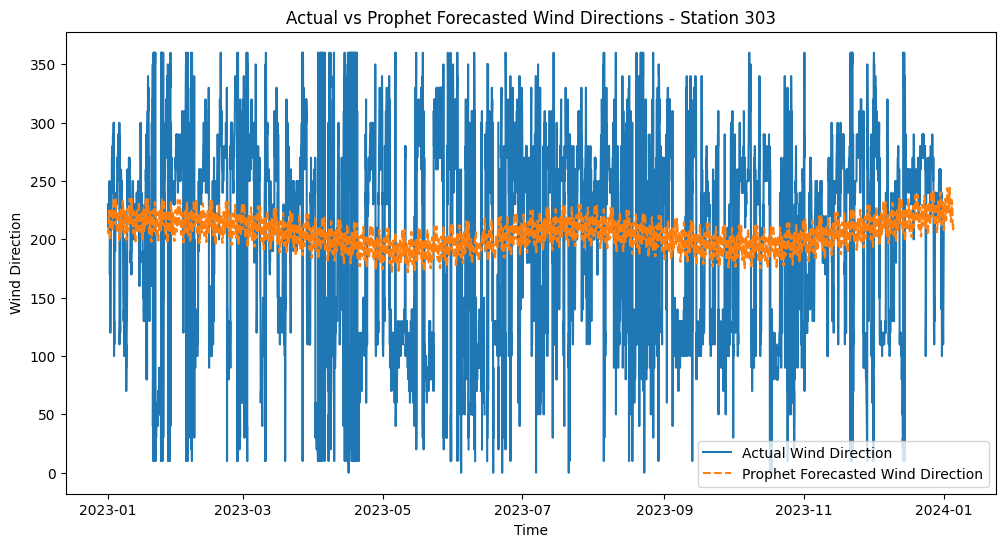

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/rvrbd6ax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/gycccw3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79855', 'data', 'file=/tmp/tmppjajatdi/rvrbd6ax.json', 'init=/tmp/tmppjajatdi/gycccw3j.json', 'output', 'file=/tmp/tmppjajatdi/prophet_model7ia3841m/prophet_model-20240722105206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

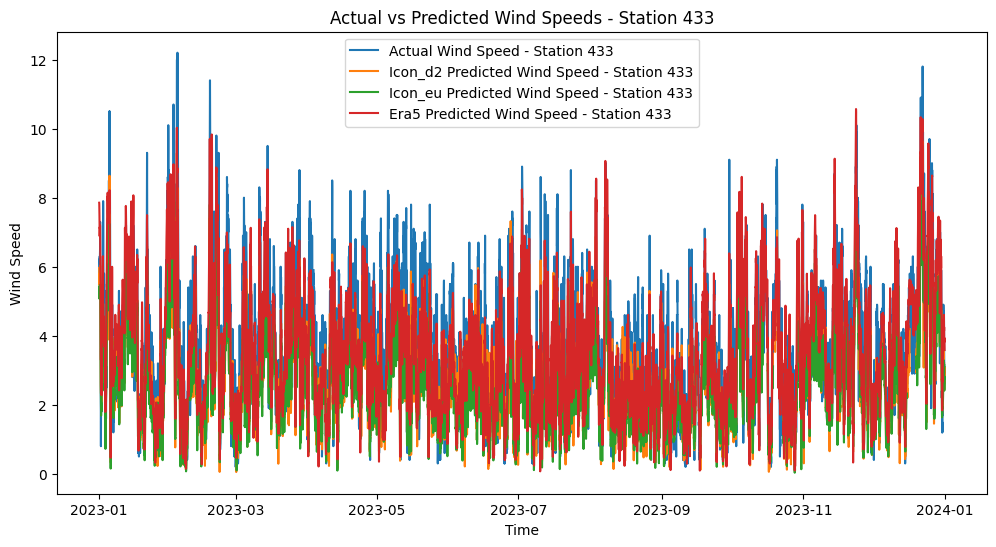

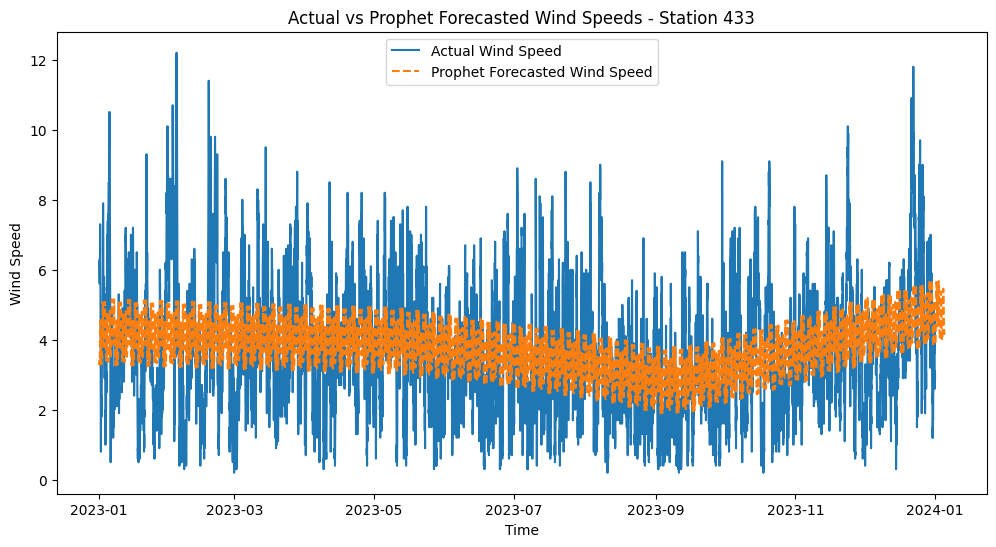

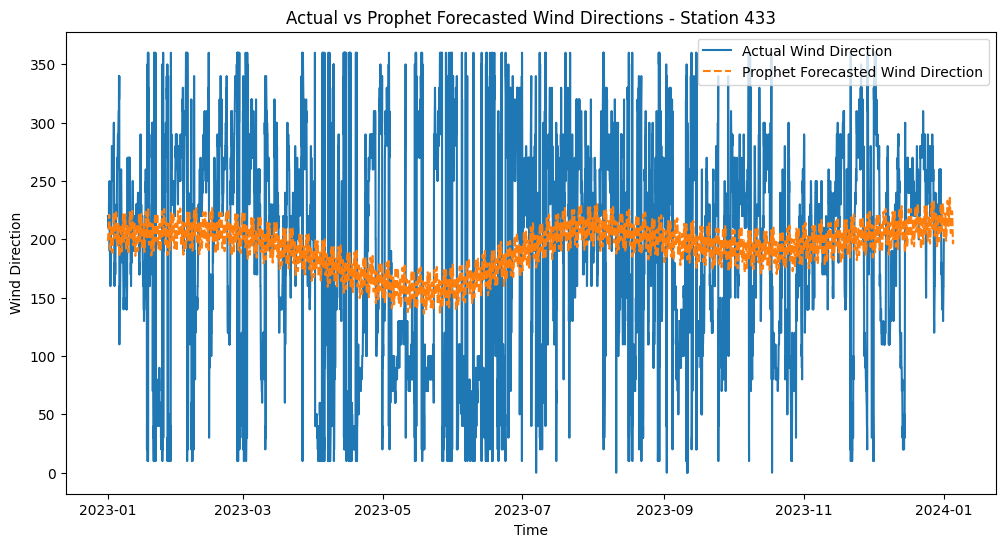

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/xe7gm21h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/fkix2s8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8405', 'data', 'file=/tmp/tmppjajatdi/xe7gm21h.json', 'init=/tmp/tmppjajatdi/fkix2s8n.json', 'output', 'file=/tmp/tmppjajatdi/prophet_modelvc7udyv_/prophet_model-20240722105214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tm

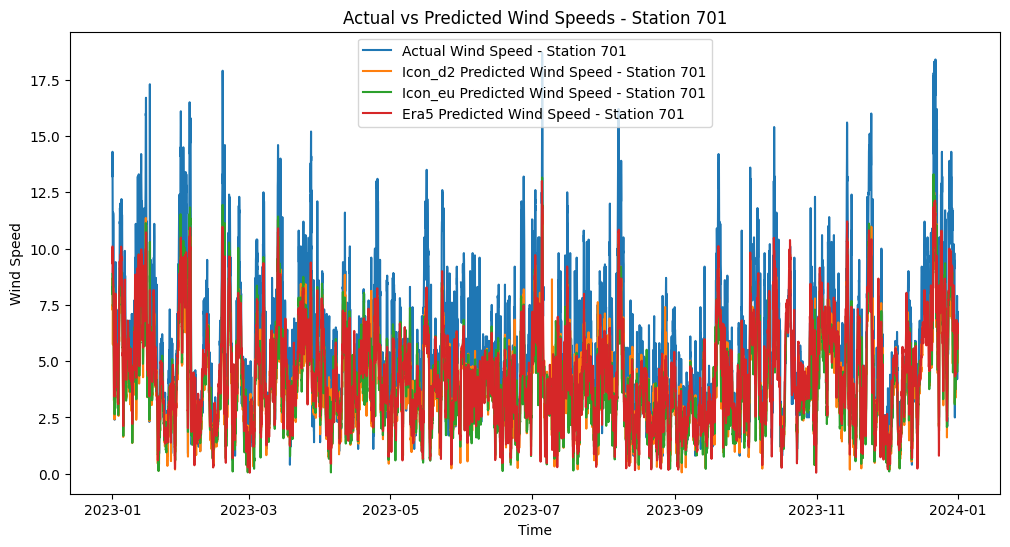

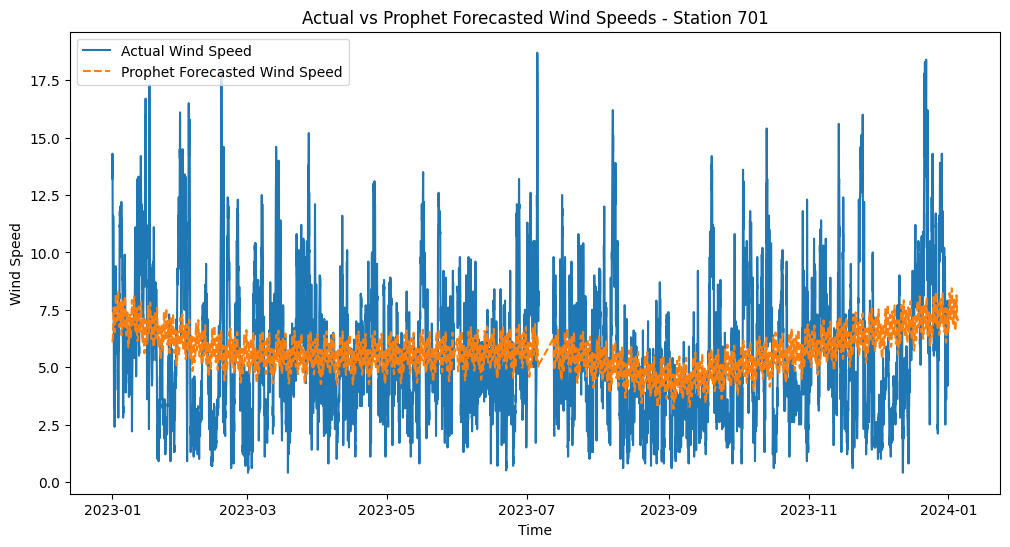

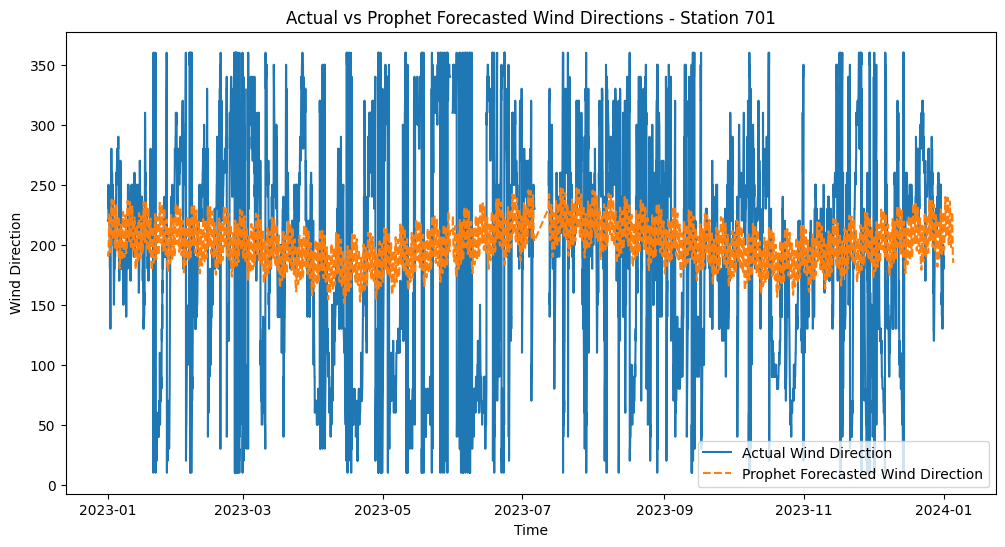

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/3fuk1q8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/0jdsxv7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22135', 'data', 'file=/tmp/tmppjajatdi/3fuk1q8n.json', 'init=/tmp/tmppjajatdi/0jdsxv7c.json', 'output', 'file=/tmp/tmppjajatdi/prophet_modelp_3u7ch5/prophet_model-20240722105222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

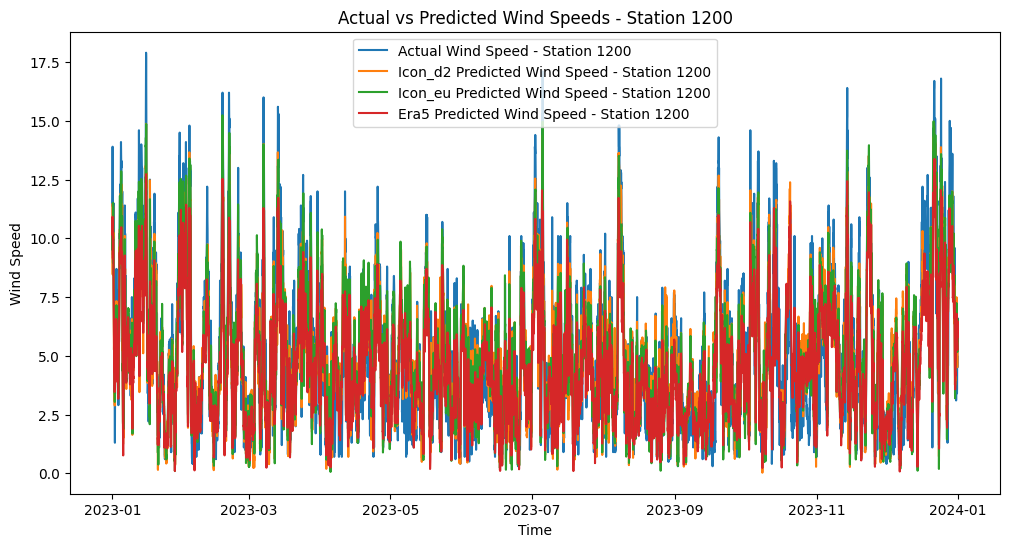

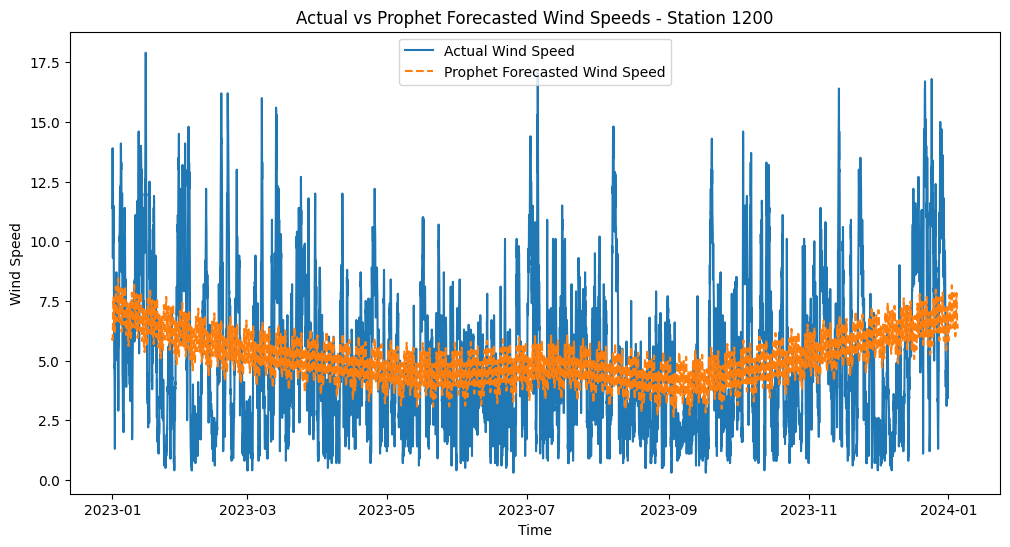

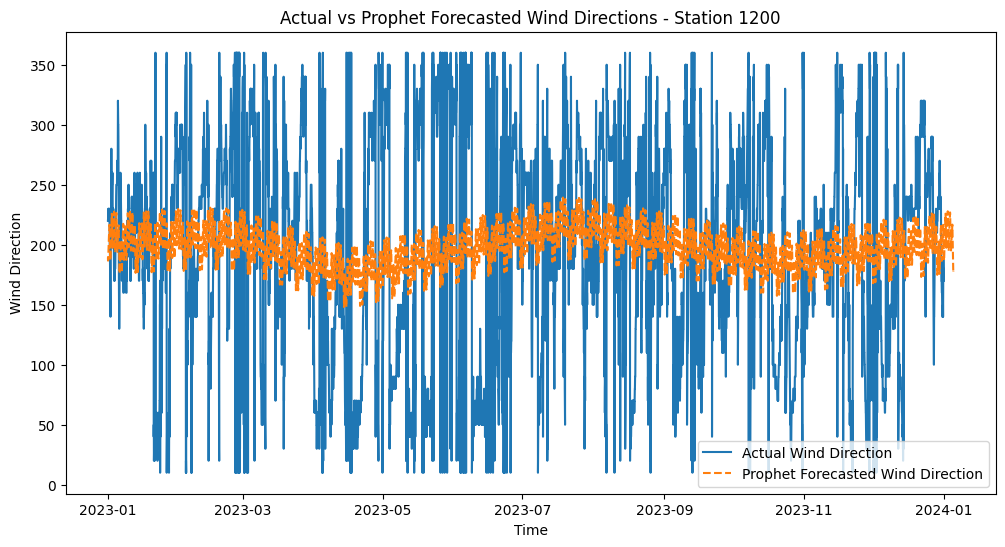

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/4htp7mb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/7dehnotj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20298', 'data', 'file=/tmp/tmppjajatdi/4htp7mb1.json', 'init=/tmp/tmppjajatdi/7dehnotj.json', 'output', 'file=/tmp/tmppjajatdi/prophet_modelecgakioo/prophet_model-20240722105230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

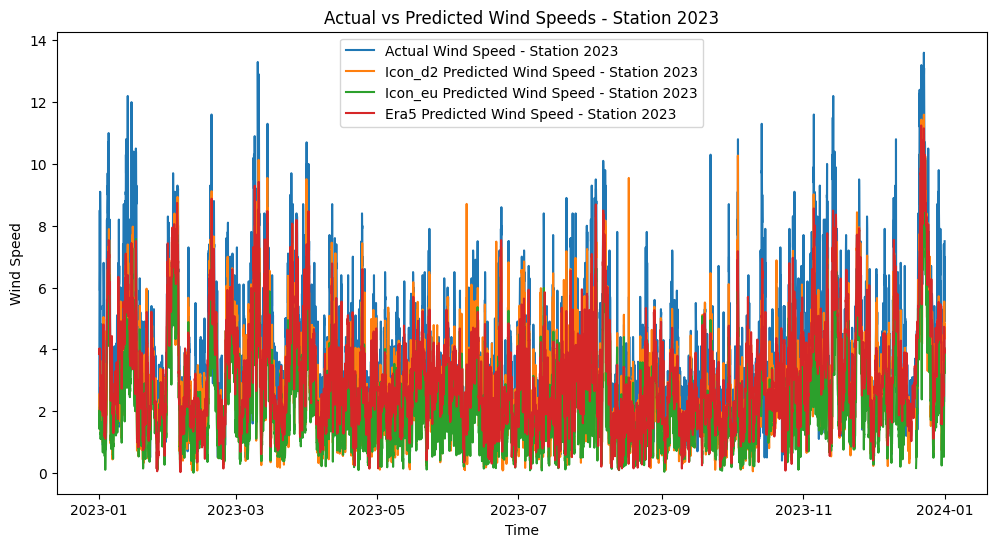

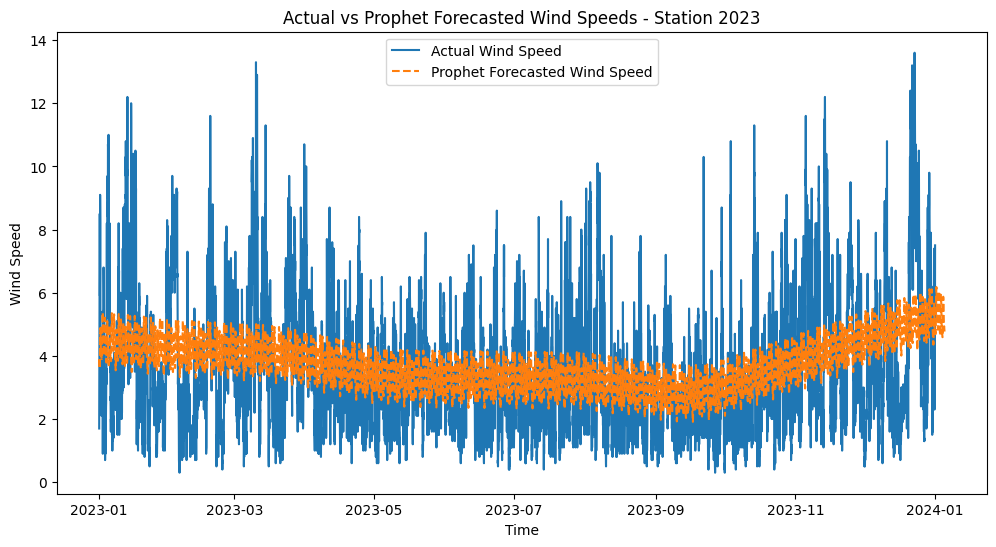

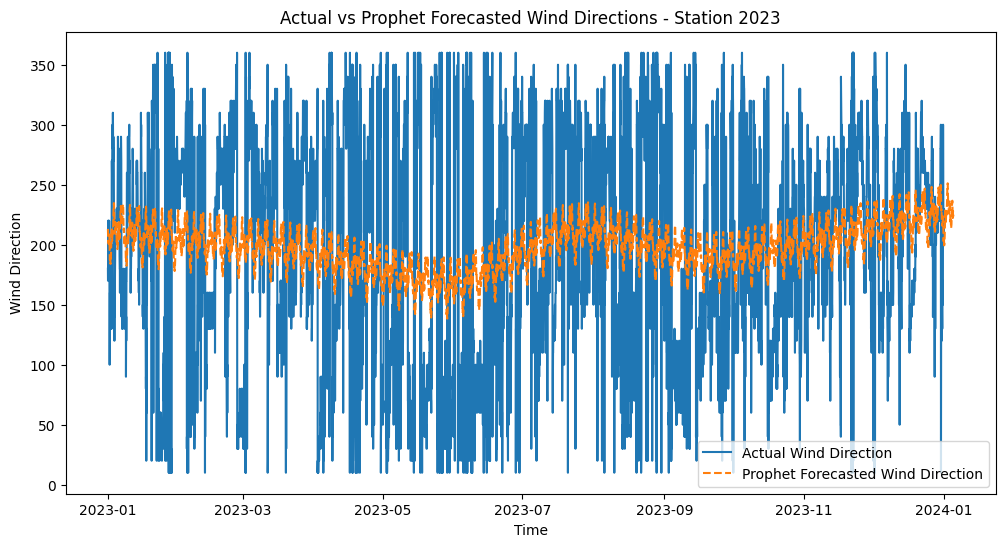

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/2ikcw293.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/6mviod3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69122', 'data', 'file=/tmp/tmppjajatdi/2ikcw293.json', 'init=/tmp/tmppjajatdi/6mviod3e.json', 'output', 'file=/tmp/tmppjajatdi/prophet_modelm7t4cs41/prophet_model-20240722105239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

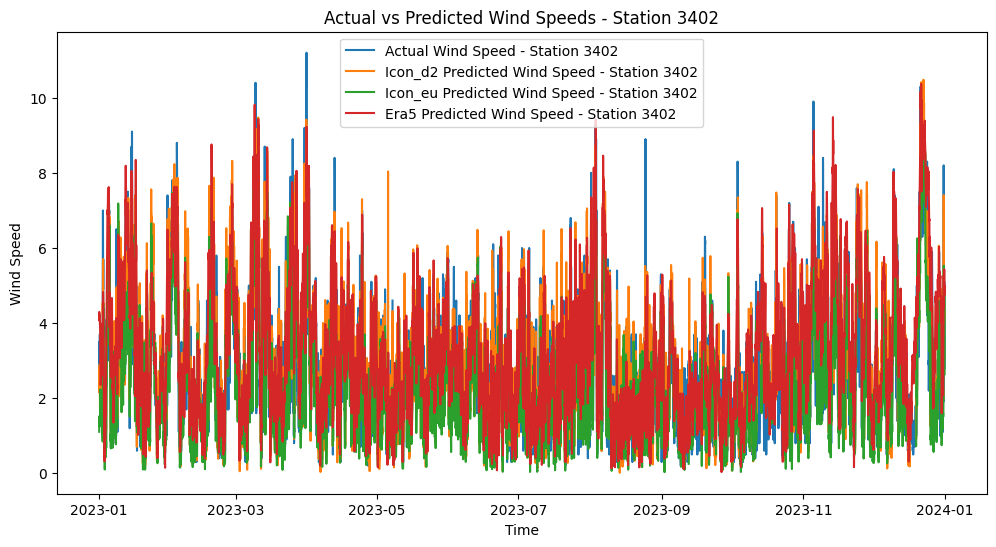

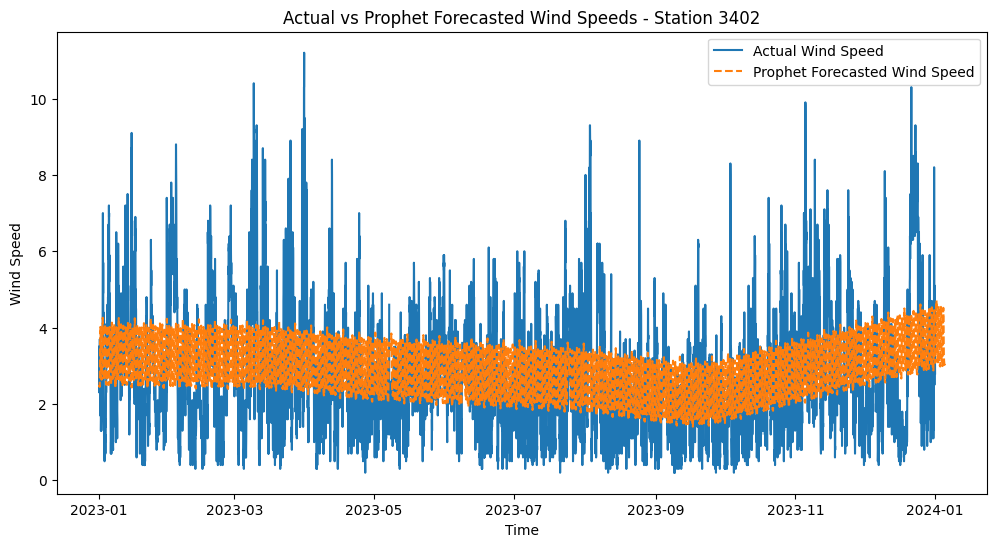

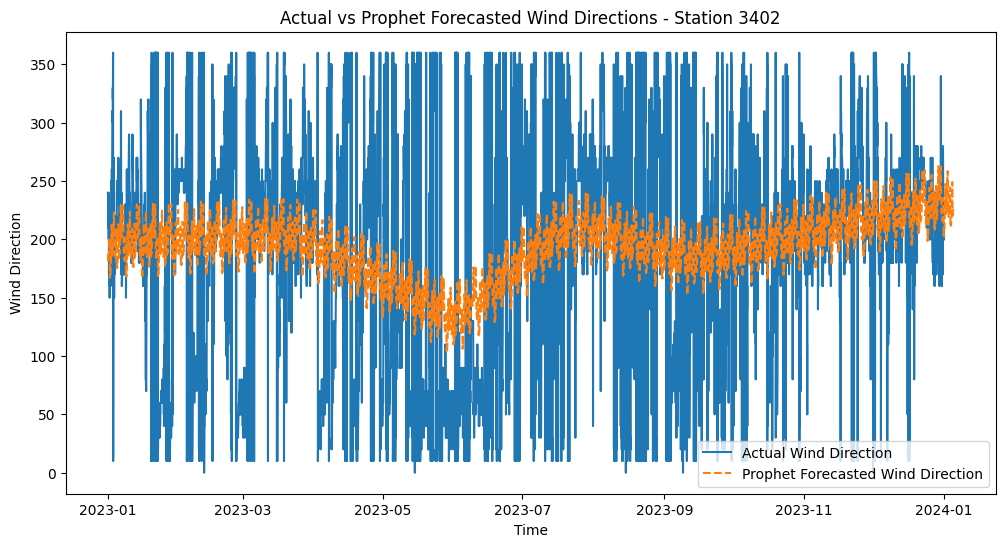

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/n_hyvsa1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/8_5rom5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94354', 'data', 'file=/tmp/tmppjajatdi/n_hyvsa1.json', 'init=/tmp/tmppjajatdi/8_5rom5o.json', 'output', 'file=/tmp/tmppjajatdi/prophet_modela8afvrd1/prophet_model-20240722105248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

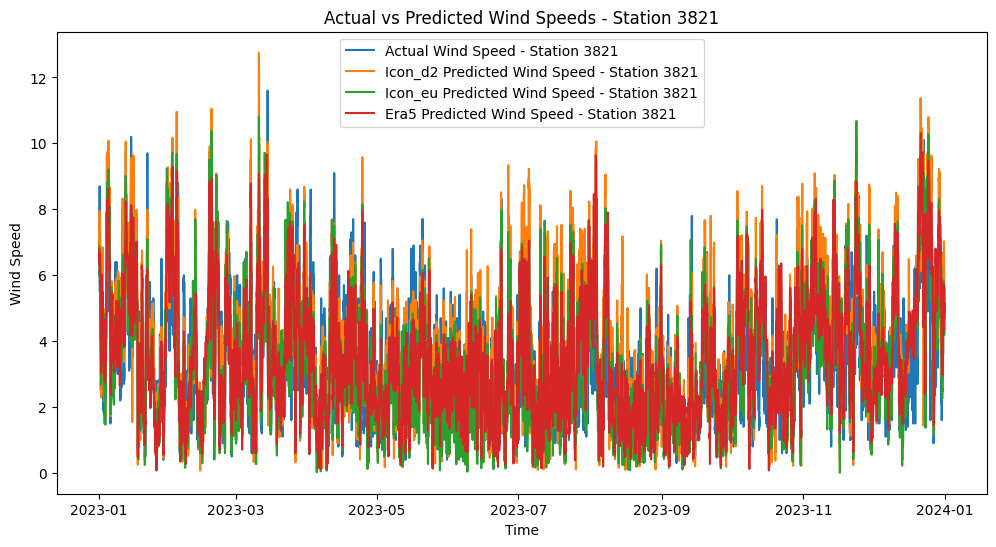

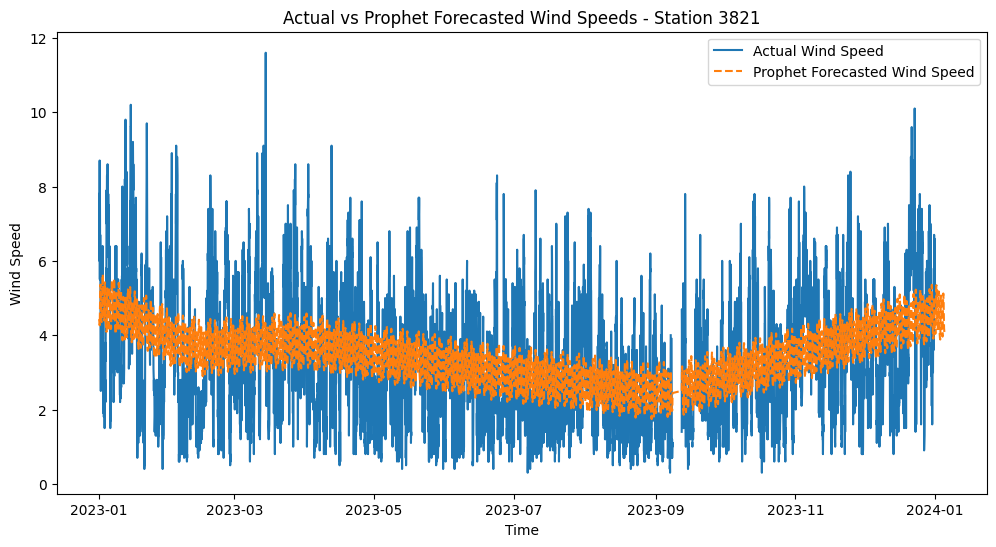

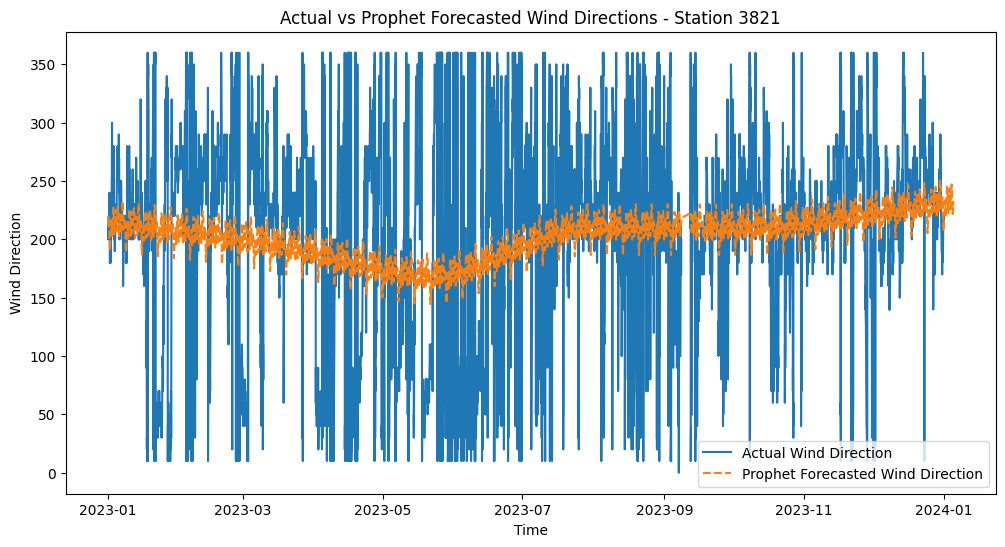

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/m362cr7t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/qg3g7lt4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52204', 'data', 'file=/tmp/tmppjajatdi/m362cr7t.json', 'init=/tmp/tmppjajatdi/qg3g7lt4.json', 'output', 'file=/tmp/tmppjajatdi/prophet_model89sb72el/prophet_model-20240722105257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

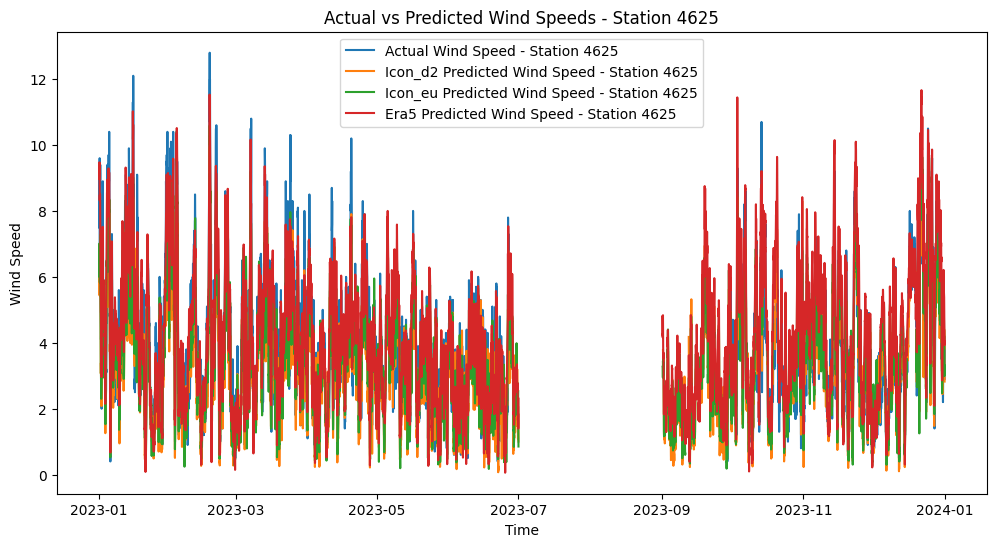

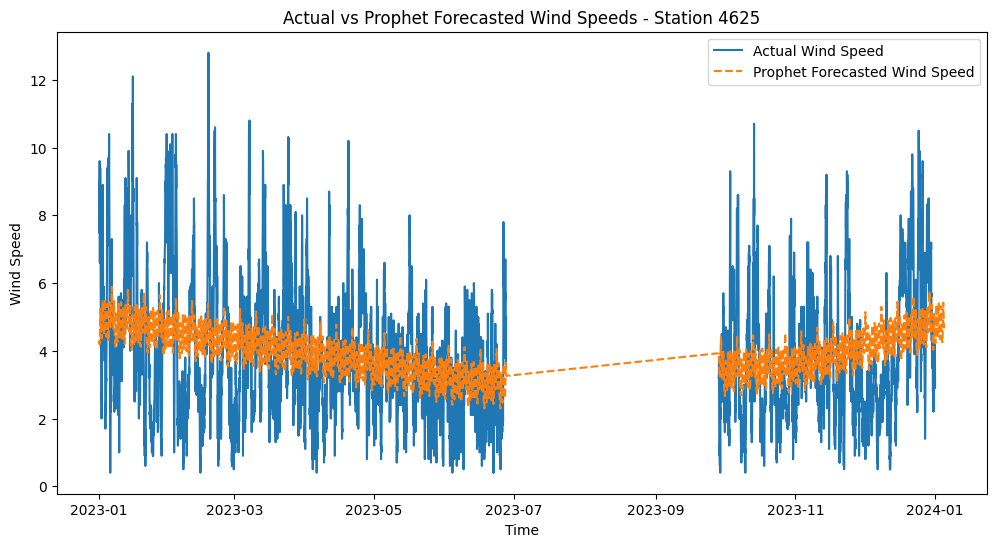

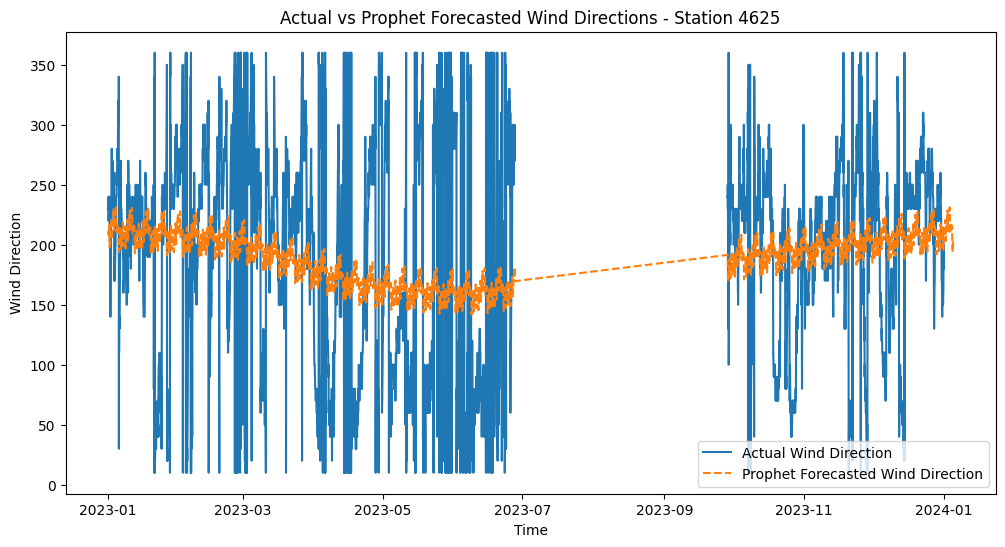

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/do5p9tcj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/dyem6jo5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62541', 'data', 'file=/tmp/tmppjajatdi/do5p9tcj.json', 'init=/tmp/tmppjajatdi/dyem6jo5.json', 'output', 'file=/tmp/tmppjajatdi/prophet_model_jj_jenz/prophet_model-20240722105304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

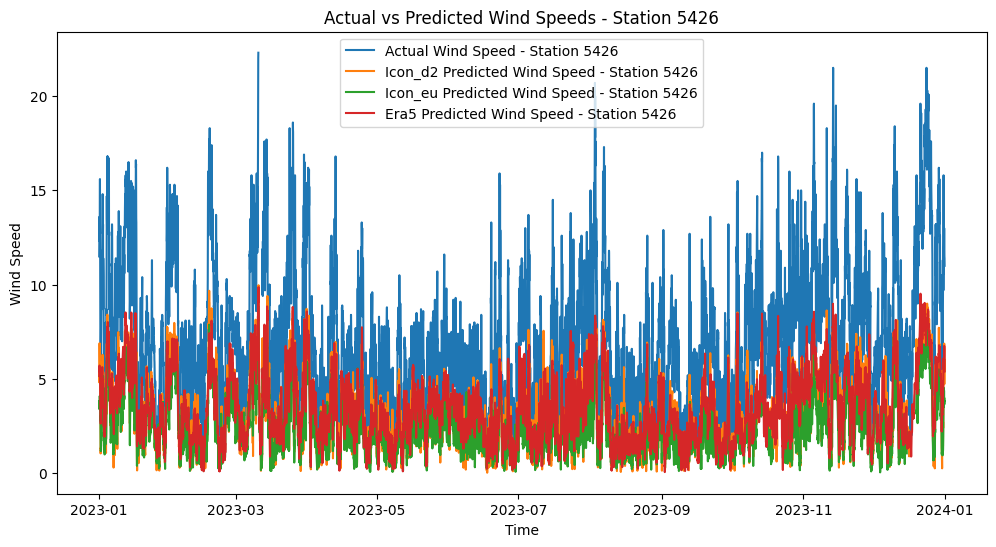

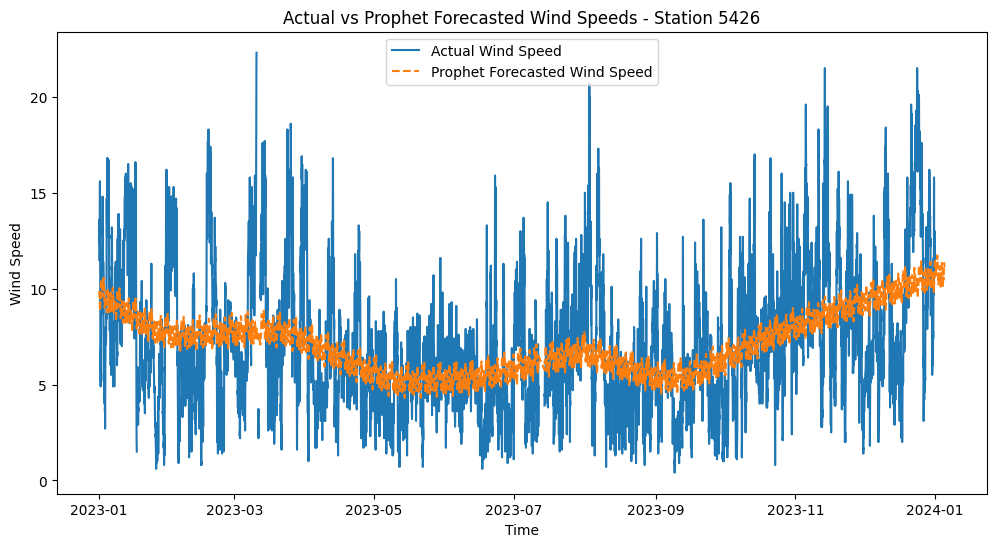

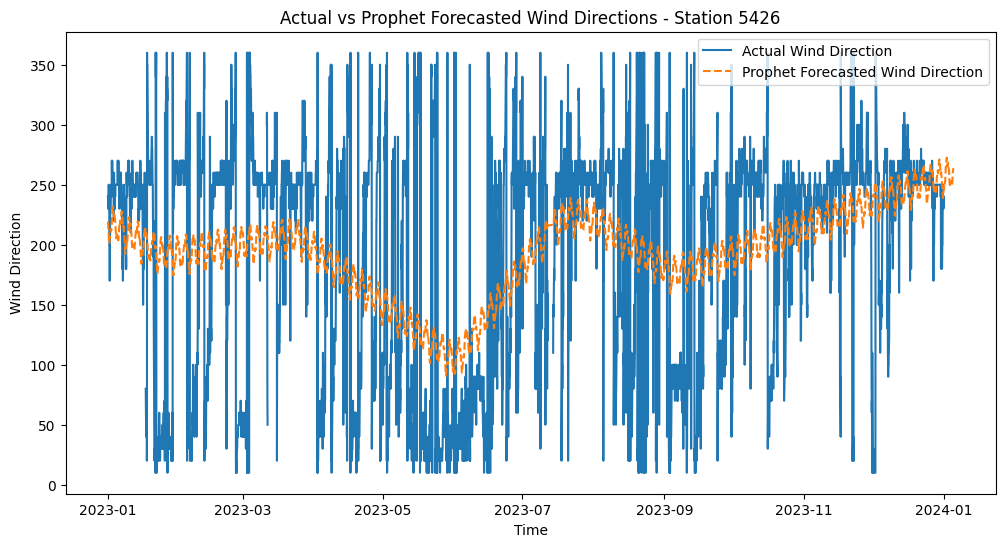

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/jh9muyyr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjajatdi/b9j8_j9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73900', 'data', 'file=/tmp/tmppjajatdi/jh9muyyr.json', 'init=/tmp/tmppjajatdi/b9j8_j9f.json', 'output', 'file=/tmp/tmppjajatdi/prophet_modelfytqx6xj/prophet_model-20240722105314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

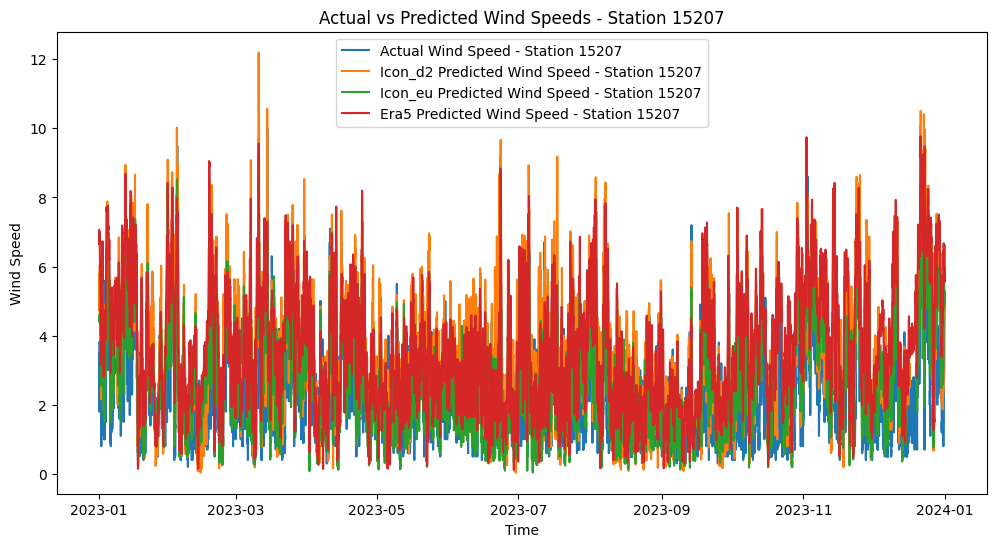

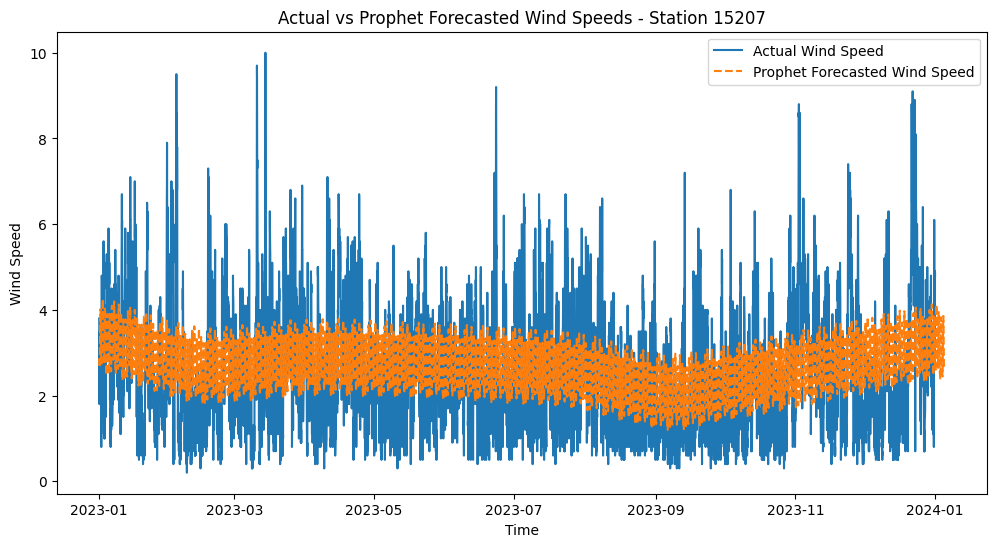

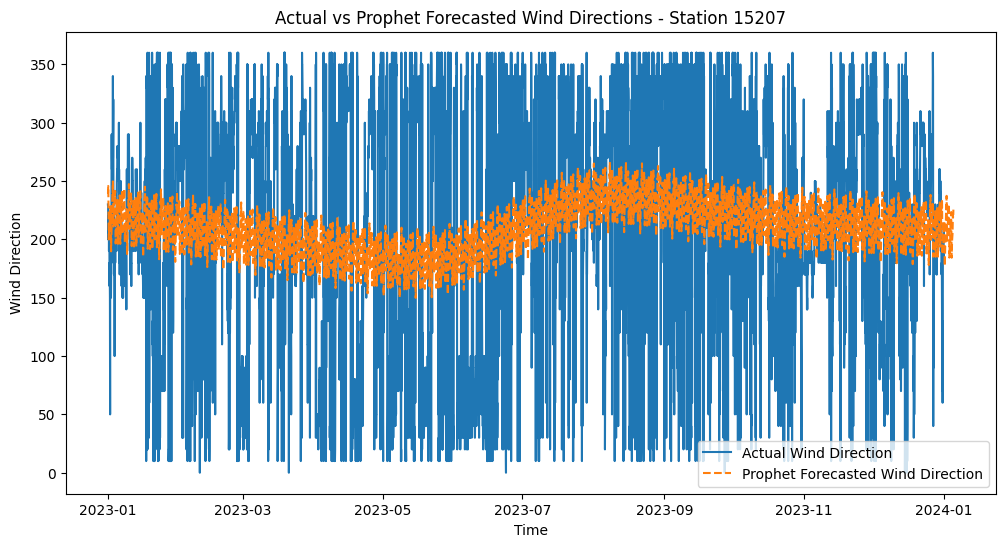

In [ ]:

# Initialize lists to store predictions for plotting
y_pred_icon_d2 = []
y_pred_icon_eu = []
y_pred_era5 = []

# Iterate over each station
station_ids = np.unique(wind_data['station_id'].values) # Use np.unique() to find unique values in a NumPy array

for i, station_id in enumerate(station_ids): # Use enumerate to get index and value
    # Filter data for the current station
    station_data = wind_data.sel(station_id=station_id) # Use .sel to select data in xarray
    wind_speed = station_data['measured_wind_speed'].values
    wind_direction = station_data['measured_wind_direction'].values # Assuming this is your wind direction data
    time = station_data['time']

    # Prepare DataFrame for Prophet (for wind speed)
    df_speed = pd.DataFrame({
        'ds': time,
        'y': wind_speed
    })

    # Fit Prophet model for wind speed
    model_prophet_speed = Prophet()
    model_prophet_speed.fit(df_speed)
    future_speed = model_prophet_speed.make_future_dataframe(periods=100, freq='H')
    forecast_prophet_speed = model_prophet_speed.predict(future_speed)

    # Prepare DataFrame for Prophet (for wind direction)
    df_direction = pd.DataFrame({
        'ds': time,
        'y': wind_direction
    })

    # Fit Prophet model for wind direction
    model_prophet_direction = Prophet()
    model_prophet_direction.fit(df_direction)
    future_direction = model_prophet_direction.make_future_dataframe(periods=100, freq='H')
    forecast_prophet_direction = model_prophet_direction.predict(future_direction)

     # Store predicted values for plotting
    y_pred_icon_d2.append(station_data['icon_d2_wind_speed'].values)
    y_pred_icon_eu.append(station_data['icon_eu_wind_speed'].values)
    y_pred_era5.append(station_data['era5_wind_speed'].values)


    # Plot actual vs predicted wind speeds
    plt.figure(figsize=(12, 6))

    # Actual wind speed - Use index 'i' to access y_true
    plt.plot(time, wind_speed, label=f'Actual Wind Speed - Station {station_id}')

    # Predicted wind speeds - Use index 'i' to access predictions
    plt.plot(time, y_pred_icon_d2[i], label=f'Icon_d2 Predicted Wind Speed - Station {station_id}')
    plt.plot(time, y_pred_icon_eu[i], label=f'Icon_eu Predicted Wind Speed - Station {station_id}')
    plt.plot(time, y_pred_era5[i], label=f'Era5 Predicted Wind Speed - Station {station_id}')

    plt.xlabel('Time')
    plt.ylabel('Wind Speed')
    plt.legend()
    plt.title(f'Actual vs Predicted Wind Speeds - Station {station_id}')
    plt.show()

    # Plot forecasted wind speeds using Prophet
    plt.figure(figsize=(12, 6))
    plt.plot(df_speed['ds'], df_speed['y'], label='Actual Wind Speed')
    plt.plot(future_speed['ds'], forecast_prophet_speed['yhat'], label='Prophet Forecasted Wind Speed', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Wind Speed')
    plt.legend()
    plt.title(f'Actual vs Prophet Forecasted Wind Speeds - Station {station_id}')
    plt.show()

    # Plot forecasted wind direction using Prophet
    plt.figure(figsize=(12, 6))
    plt.plot(df_direction['ds'], df_direction['y'], label='Actual Wind Direction')
    plt.plot(future_direction['ds'], forecast_prophet_direction['yhat'], label='Prophet Forecasted Wind Direction', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Wind Direction')
    plt.legend()
    plt.title(f'Actual vs Prophet Forecasted Wind Directions - Station {station_id}')
    plt.show()


## model evaluvation

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

# Load dataset
wind_data = xr.open_dataset("wind_2023.nc")



# Initialize lists to store predictions for EDA
y_true_speed_test = []
y_pred_speed_test_prophet = []
y_pred_speed_test_arima = []
y_pred_speed_test_lstm = []

# Function to impute NaNs with mean
def impute_with_mean(values):
    mean_value = np.nanmean(values)
    return np.nan_to_num(values, nan=mean_value)

# Function to flatten and align arrays
def flatten_and_align(y_true, y_pred):
    min_length = min(len(y_true), len(y_pred))
    return y_true[:min_length], y_pred[:min_length]

# Iterate over each station
station_ids = np.unique(wind_data['station_id'].values)

for station_id in station_ids:
    # Filter data for the current station
    station_data = wind_data.sel(station_id=station_id)
    wind_speed = station_data['measured_wind_speed'].values
    time = pd.to_datetime(station_data['time'].values)

    # Create DataFrame for wind speed
    df_speed = pd.DataFrame({
        'ds': time,
        'y': wind_speed
    })

    # Split the data into training (80%) and testing (20%) sets
    split_index = int(len(df_speed) * 0.8)
    train_speed = df_speed[:split_index]
    test_speed = df_speed[split_index:]

    # Prophet model
    model_prophet_speed = Prophet()
    model_prophet_speed.fit(train_speed)
    future_speed = model_prophet_speed.make_future_dataframe(periods=len(test_speed), freq='H')
    forecast_prophet_speed = model_prophet_speed.predict(future_speed)
    y_pred_speed_prophet = forecast_prophet_speed.set_index('ds')['yhat'].reindex(test_speed['ds']).values

    # ARIMA model
    model_arima_speed = ARIMA(train_speed['y'], order=(5, 1, 0))
    model_arima_speed_fit = model_arima_speed.fit()
    y_pred_speed_arima = model_arima_speed_fit.forecast(steps=len(test_speed))
    y_pred_speed_arima = np.array(y_pred_speed_arima)

    # LSTM model
    def create_lstm_dataset(X, time_step=1):
        Xs = []
        for i in range(len(X) - time_step):
            v = X[i:(i + time_step)]
            Xs.append(v)
        return np.array(Xs)

    time_step = 10
    train_speed_lstm = train_speed['y'].values
    test_speed_lstm = test_speed['y'].values
    train_speed_lstm = impute_with_mean(train_speed_lstm)
    test_speed_lstm = impute_with_mean(test_speed_lstm)

    train_speed_lstm_X = create_lstm_dataset(train_speed_lstm, time_step)
    test_speed_lstm_X = create_lstm_dataset(test_speed_lstm, time_step)

    train_speed_lstm_Y = train_speed_lstm[time_step:]
    test_speed_lstm_Y = test_speed_lstm[time_step:]

    model_lstm_speed = Sequential()
    model_lstm_speed.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model_lstm_speed.add(LSTM(50, return_sequences=False))
    model_lstm_speed.add(Dense(25))
    model_lstm_speed.add(Dense(1))

    model_lstm_speed.compile(optimizer='adam', loss='mean_squared_error')
    model_lstm_speed.fit(train_speed_lstm_X, train_speed_lstm_Y, batch_size=1, epochs=1)

    y_pred_speed_lstm = model_lstm_speed.predict(test_speed_lstm_X)

    # Align and flatten arrays
    y_true_speed = test_speed.set_index('ds')['y'].values[time_step:]
    y_true_speed = impute_with_mean(y_true_speed)

    y_true_speed, y_pred_speed_prophet = flatten_and_align(y_true_speed, y_pred_speed_prophet[time_step:])
    y_true_speed, y_pred_speed_arima = flatten_and_align(y_true_speed, y_pred_speed_arima)
    y_true_speed, y_pred_speed_lstm = flatten_and_align(y_true_speed, y_pred_speed_lstm.flatten())

    y_true_speed_test.append(y_true_speed)
    y_pred_speed_test_prophet.append(y_pred_speed_prophet)
    y_pred_speed_test_arima.append(y_pred_speed_arima)
    y_pred_speed_test_lstm.append(y_pred_speed_lstm)

# Flatten lists for evaluation
y_true_speed_flat = np.concatenate(y_true_speed_test)
y_pred_speed_flat_prophet = np.concatenate(y_pred_speed_test_prophet)
y_pred_speed_flat_arima = np.concatenate(y_pred_speed_test_arima)
y_pred_speed_flat_lstm = np.concatenate(y_pred_speed_test_lstm)

# Calculate metrics for wind speed
mae_speed_prophet = mean_absolute_error(y_true_speed_flat, y_pred_speed_flat_prophet)
mse_speed_prophet = mean_squared_error(y_true_speed_flat, y_pred_speed_flat_prophet)
rmse_speed_prophet = np.sqrt(mse_speed_prophet)
mape_speed_prophet = mean_absolute_percentage_error(y_true_speed_flat, y_pred_speed_flat_prophet)

mae_speed_arima = mean_absolute_error(y_true_speed_flat, y_pred_speed_flat_arima)
mse_speed_arima = mean_squared_error(y_true_speed_flat, y_pred_speed_flat_arima)
rmse_speed_arima = np.sqrt(mse_speed_arima)
mape_speed_arima = mean_absolute_percentage_error(y_true_speed_flat, y_pred_speed_flat_arima)

mae_speed_lstm = mean_absolute_error(y_true_speed_flat, y_pred_speed_flat_lstm)
mse_speed_lstm = mean_squared_error(y_true_speed_flat, y_pred_speed_flat_lstm)
rmse_speed_lstm = np.sqrt(mse_speed_lstm)
mape_speed_lstm = mean_absolute_percentage_error(y_true_speed_flat, y_pred_speed_flat_lstm)

# Print metrics for each model
print('Prophet Model:')
print(f'Mean Absolute Error for Wind Speed: {mae_speed_prophet}')
print(f'Mean Squared Error for Wind Speed: {mse_speed_prophet}')
print(f'Root Mean Squared Error for Wind Speed: {rmse_speed_prophet}')
print(f'Mean Absolute Percentage Error for Wind Speed: {mape_speed_prophet}')

print('\nARIMA Model:')
print(f'Mean Absolute Error for Wind Speed: {mae_speed_arima}')
print(f'Mean Squared Error for Wind Speed: {mse_speed_arima}')
print(f'Root Mean Squared Error for Wind Speed: {rmse_speed_arima}')
print(f'Mean Absolute Percentage Error for Wind Speed: {mape_speed_arima}')

print('\nLSTM Model:')
print(f'Mean Absolute Error for Wind Speed: {mae_speed_lstm}')
print(f'Mean Squared Error for Wind Speed: {mse_speed_lstm}')
print(f'Root Mean Squared Error for Wind Speed: {rmse_speed_lstm}')
print(f'Mean Absolute Percentage Error for Wind Speed: {mape_speed_lstm}')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/hxhnhthz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/_ogfx31x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83196', 'data', 'file=/tmp/tmpb5zkivr5/hxhnhthz.json', 'init=/tmp/tmpb5zkivr5/_ogfx31x.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model83wpqc3e/prophet_model-20240722142635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/7cvt11ui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/j6nmavgn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39540', 'data', 'file=/tmp/tmpb5zkivr5/7cvt11ui.json', 'init=/tmp/tmpb5zkivr5/j6nmavgn.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelpdrxrci_/prophet_model-20240722142754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/smlfhy0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/m_kiment.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32951', 'data', 'file=/tmp/tmpb5zkivr5/smlfhy0m.json', 'init=/tmp/tmpb5zkivr5/m_kiment.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelc08kidjz/prophet_model-20240722142925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/ovxabwxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/7q5ra46h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87952', 'data', 'file=/tmp/tmpb5zkivr5/ovxabwxy.json', 'init=/tmp/tmpb5zkivr5/7q5ra46h.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model4wefh7_o/prophet_model-20240722143041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/f5lwb2mq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/9rpfninv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29126', 'data', 'file=/tmp/tmpb5zkivr5/f5lwb2mq.json', 'init=/tmp/tmpb5zkivr5/9rpfninv.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelt4jqr11s/prophet_model-20240722143213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/hi3qf8t9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/u64t2ylx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18862', 'data', 'file=/tmp/tmpb5zkivr5/hi3qf8t9.json', 'init=/tmp/tmpb5zkivr5/u64t2ylx.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelayvo_4eu/prophet_model-20240722143345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/qnd26o19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/9980im11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86584', 'data', 'file=/tmp/tmpb5zkivr5/qnd26o19.json', 'init=/tmp/tmpb5zkivr5/9980im11.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelwwamdo8l/prophet_model-20240722143516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/7haj5xod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/db8uv7v3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16457', 'data', 'file=/tmp/tmpb5zkivr5/7haj5xod.json', 'init=/tmp/tmpb5zkivr5/db8uv7v3.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelbw8s4t26/prophet_model-20240722143633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/wwwvkpad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/we_j946_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25200', 'data', 'file=/tmp/tmpb5zkivr5/wwwvkpad.json', 'init=/tmp/tmpb5zkivr5/we_j946_.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model4pswogy1/prophet_model-20240722143803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 2s 7ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/en2u_f02.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/47jzmejm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56098', 'data', 'file=/tmp/tmpb5zkivr5/en2u_f02.json', 'init=/tmp/tmpb5zkivr5/47jzmejm.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelef1a22tn/prophet_model-20240722143919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step
Prophet Model:
Mean Absolute Error for Wind Speed: 2.088242659448477
Mean Squared Error for Wind Speed: 7.644384328451805
Root Mean Squared Error for Wind Speed: 2.7648479756492588
Mean Absolute Percentage Error for Wind Speed: 0.6327057250820893

ARIMA Model:
Mean Absolute Error for Wind Speed: 2.37902932354999
Mean Squared Error for Wind Speed: 9.509280820401212
Root Mean Squared Error for Wind Speed: 3.0837121818355895
Mean Absolute Percentage Error for Wind Speed: 0.7141849343673655

LSTM Model:
Mean Absolute Error for Wind Speed: 0.6559633452702487
Mean Squared Error for Wind Speed: 0.8422862216642928
Root Mean Squared Error for Wind Speed: 0.9177615276662521
Mean Absolute Percentage Error for Wind Speed: 0.18559084713889112


## wind direction

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
wind_data = xr.open_dataset("wind_2023.nc")

# Initialize lists to store predictions for EDA
y_true_direction_test = []
y_pred_direction_test_prophet = []
y_pred_direction_test_arima = []
y_pred_direction_test_lstm = []

# Function to impute NaNs with mean
def impute_with_mean(values):
    mean_value = np.nanmean(values)
    return np.nan_to_num(values, nan=mean_value)

# Function to flatten and align arrays
def flatten_and_align(y_true, y_pred):
    min_length = min(len(y_true), len(y_pred))
    return y_true[:min_length], y_pred[:min_length]

# Iterate over each station
station_ids = np.unique(wind_data['station_id'].values)

for station_id in station_ids:
    # Filter data for the current station
    station_data = wind_data.sel(station_id=station_id)
    wind_direction = station_data['measured_wind_direction'].values
    time = pd.to_datetime(station_data['time'].values)

    # Create DataFrame for wind direction
    df_direction = pd.DataFrame({
        'ds': time,
        'y': wind_direction
    })

    # Split the data into training (80%) and testing (20%) sets
    split_index = int(len(df_direction) * 0.8)
    train_direction = df_direction[:split_index]
    test_direction = df_direction[split_index:]

    # Prophet model
    model_prophet_direction = Prophet()
    model_prophet_direction.fit(train_direction)
    future_direction = model_prophet_direction.make_future_dataframe(periods=len(test_direction), freq='H')
    forecast_prophet_direction = model_prophet_direction.predict(future_direction)
    y_pred_direction_prophet = forecast_prophet_direction.set_index('ds')['yhat'].reindex(test_direction['ds']).values

    # ARIMA model
    model_arima_direction = ARIMA(train_direction['y'], order=(5, 1, 0))
    model_arima_direction_fit = model_arima_direction.fit()
    y_pred_direction_arima = model_arima_direction_fit.forecast(steps=len(test_direction))
    y_pred_direction_arima = np.array(y_pred_direction_arima)

    # LSTM model
    def create_lstm_dataset(X, time_step=1):
        Xs = []
        for i in range(len(X) - time_step):
            v = X[i:(i + time_step)]
            Xs.append(v)
        return np.array(Xs)

    time_step = 10
    train_direction_lstm = train_direction['y'].values
    test_direction_lstm = test_direction['y'].values
    train_direction_lstm = impute_with_mean(train_direction_lstm)
    test_direction_lstm = impute_with_mean(test_direction_lstm)

    train_direction_lstm_X = create_lstm_dataset(train_direction_lstm, time_step)
    test_direction_lstm_X = create_lstm_dataset(test_direction_lstm, time_step)

    train_direction_lstm_Y = train_direction_lstm[time_step:]
    test_direction_lstm_Y = test_direction_lstm[time_step:]

    model_lstm_direction = Sequential()
    model_lstm_direction.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model_lstm_direction.add(LSTM(50, return_sequences=False))
    model_lstm_direction.add(Dense(25))
    model_lstm_direction.add(Dense(1))

    model_lstm_direction.compile(optimizer='adam', loss='mean_squared_error')
    model_lstm_direction.fit(train_direction_lstm_X, train_direction_lstm_Y, batch_size=1, epochs=1)

    y_pred_direction_lstm = model_lstm_direction.predict(test_direction_lstm_X)

    # Align and flatten arrays
    y_true_direction = test_direction.set_index('ds')['y'].values[time_step:]
    y_true_direction = impute_with_mean(y_true_direction)

    y_true_direction, y_pred_direction_prophet = flatten_and_align(y_true_direction, y_pred_direction_prophet[time_step:])
    y_true_direction, y_pred_direction_arima = flatten_and_align(y_true_direction, y_pred_direction_arima)
    y_true_direction, y_pred_direction_lstm = flatten_and_align(y_true_direction, y_pred_direction_lstm.flatten())

    y_true_direction_test.append(y_true_direction)
    y_pred_direction_test_prophet.append(y_pred_direction_prophet)
    y_pred_direction_test_arima.append(y_pred_direction_arima)
    y_pred_direction_test_lstm.append(y_pred_direction_lstm)

# Flatten lists for evaluation
y_true_direction_flat = np.concatenate(y_true_direction_test)
y_pred_direction_flat_prophet = np.concatenate(y_pred_direction_test_prophet)
y_pred_direction_flat_arima = np.concatenate(y_pred_direction_test_arima)
y_pred_direction_flat_lstm = np.concatenate(y_pred_direction_test_lstm)

# Calculate metrics for wind direction
mae_direction_prophet = mean_absolute_error(y_true_direction_flat, y_pred_direction_flat_prophet)
mse_direction_prophet = mean_squared_error(y_true_direction_flat, y_pred_direction_flat_prophet)
rmse_direction_prophet = np.sqrt(mse_direction_prophet)
mape_direction_prophet = mean_absolute_percentage_error(y_true_direction_flat, y_pred_direction_flat_prophet)

mae_direction_arima = mean_absolute_error(y_true_direction_flat, y_pred_direction_flat_arima)
mse_direction_arima = mean_squared_error(y_true_direction_flat, y_pred_direction_flat_arima)
rmse_direction_arima = np.sqrt(mse_direction_arima)
mape_direction_arima = mean_absolute_percentage_error(y_true_direction_flat, y_pred_direction_flat_arima)

mae_direction_lstm = mean_absolute_error(y_true_direction_flat, y_pred_direction_flat_lstm)
mse_direction_lstm = mean_squared_error(y_true_direction_flat, y_pred_direction_flat_lstm)
rmse_direction_lstm = np.sqrt(mse_direction_lstm)
mape_direction_lstm = mean_absolute_percentage_error(y_true_direction_flat, y_pred_direction_flat_lstm)

# Print metrics for each model
print('Prophet Model:')
print(f'Mean Absolute Error for Wind Direction: {mae_direction_prophet}')
print(f'Mean Squared Error for Wind Direction: {mse_direction_prophet}')
print(f'Root Mean Squared Error for Wind Direction: {rmse_direction_prophet}')
print(f'Mean Absolute Percentage Error for Wind Direction: {mape_direction_prophet}')

print('\nARIMA Model:')
print(f'Mean Absolute Error for Wind Direction: {mae_direction_arima}')
print(f'Mean Squared Error for Wind Direction: {mse_direction_arima}')
print(f'Root Mean Squared Error for Wind Direction: {rmse_direction_arima}')
print(f'Mean Absolute Percentage Error for Wind Direction: {mape_direction_arima}')

print('\nLSTM Model:')
print(f'Mean Absolute Error for Wind Direction: {mae_direction_lstm}')
print(f'Mean Squared Error for Wind Direction: {mse_direction_lstm}')
print(f'Root Mean Squared Error for Wind Direction: {rmse_direction_lstm}')
print(f'Mean Absolute Percentage Error for Wind Direction: {mape_direction_lstm}')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/00m817sj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/jk9szcva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33759', 'data', 'file=/tmp/tmpb5zkivr5/00m817sj.json', 'init=/tmp/tmpb5zkivr5/jk9szcva.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model9eclu5_f/prophet_model-20240722180932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:09:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:09:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 2s 7ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/2w79qs3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/7tdt6e8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70235', 'data', 'file=/tmp/tmpb5zkivr5/2w79qs3q.json', 'init=/tmp/tmpb5zkivr5/7tdt6e8z.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model46i48pl4/prophet_model-20240722181105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/c4myr83v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/bk31jrfu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71830', 'data', 'file=/tmp/tmpb5zkivr5/c4myr83v.json', 'init=/tmp/tmpb5zkivr5/bk31jrfu.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model3kp_5owl/prophet_model-20240722181236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:12:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:12:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/o8wcs7up.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/4nbyw1lz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49197', 'data', 'file=/tmp/tmpb5zkivr5/o8wcs7up.json', 'init=/tmp/tmpb5zkivr5/4nbyw1lz.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model0dx089kn/prophet_model-20240722181408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:14:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:14:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/mr_mvnm1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/e2u2sl1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58220', 'data', 'file=/tmp/tmpb5zkivr5/mr_mvnm1.json', 'init=/tmp/tmpb5zkivr5/e2u2sl1v.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model8zm7sa4h/prophet_model-20240722181539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:15:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:15:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 6ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/p69xqkzt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/4abbi1om.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36459', 'data', 'file=/tmp/tmpb5zkivr5/p69xqkzt.json', 'init=/tmp/tmpb5zkivr5/4abbi1om.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelzhbnykam/prophet_model-20240722181712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:17:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:17:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 4ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/r_sbdncf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/qcqgl1cr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43239', 'data', 'file=/tmp/tmpb5zkivr5/r_sbdncf.json', 'init=/tmp/tmpb5zkivr5/qcqgl1cr.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelrfgzrqtz/prophet_model-20240722181824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/bsiae30e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/gxzv1rxk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60574', 'data', 'file=/tmp/tmpb5zkivr5/bsiae30e.json', 'init=/tmp/tmpb5zkivr5/gxzv1rxk.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modeltzaboi_9/prophet_model-20240722181936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 4ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/5oqwrc05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/agj9ddl0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2529', 'data', 'file=/tmp/tmpb5zkivr5/5oqwrc05.json', 'init=/tmp/tmpb5zkivr5/agj9ddl0.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model49i7ui5_/prophet_model-20240722182107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/jatpc4i4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/3hrapcc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42197', 'data', 'file=/tmp/tmpb5zkivr5/jatpc4i4.json', 'init=/tmp/tmpb5zkivr5/3hrapcc4.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modell2onckcl/prophet_model-20240722182219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:22:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step
Prophet Model:
Mean Absolute Error for Wind Direction: 65.6776884568416
Mean Squared Error for Wind Direction: 6451.176272026124
Root Mean Squared Error for Wind Direction: 80.31921483696242
Mean Absolute Percentage Error for Wind Direction: 146126549471265.22

ARIMA Model:
Mean Absolute Error for Wind Direction: 113.39310699945325
Mean Squared Error for Wind Direction: 16418.529388950647
Root Mean Squared Error for Wind Direction: 128.13480943502685
Mean Absolute Percentage Error for Wind Direction: 91052807896489.08

LSTM Model:
Mean Absolute Error for Wind Direction: 24.539232545400626
Mean Squared Error for Wind Direction: 1657.4935191621432
Root Mean Squared Error for Wind Direction: 40.71232637865519
Mean Absolute Percentage Error for Wind Direction: 166506996266761.4


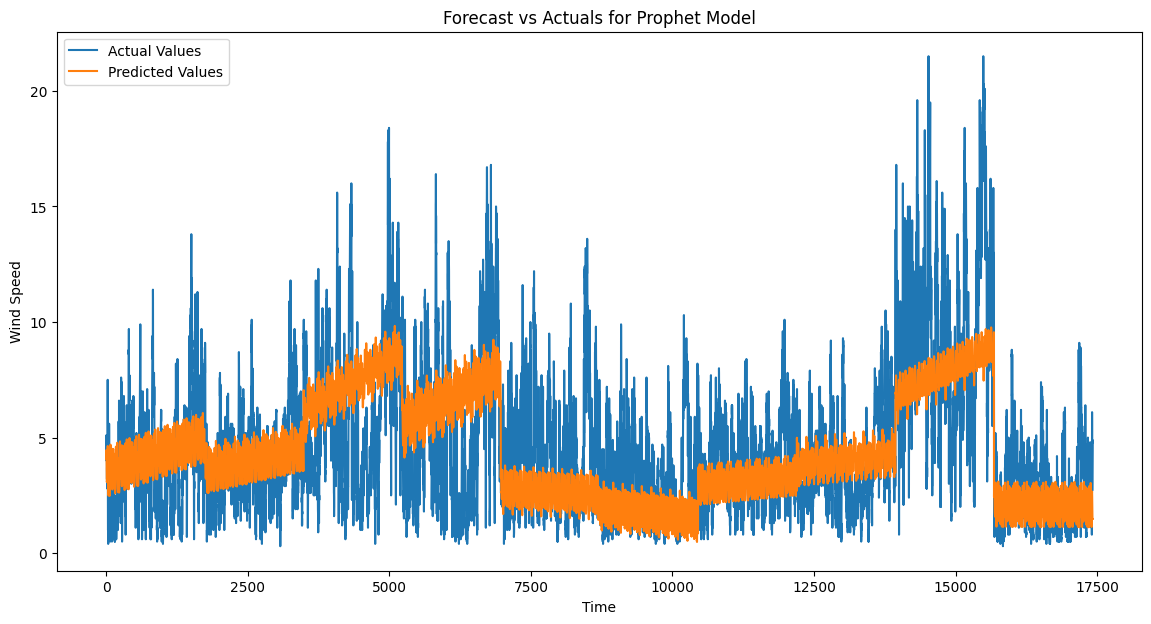

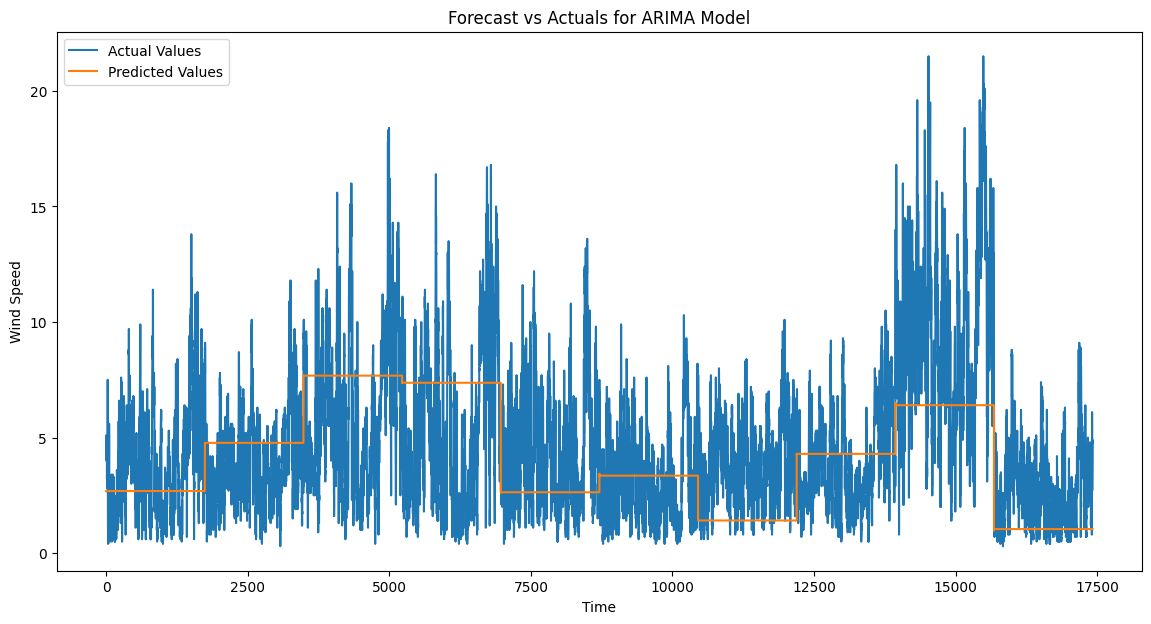

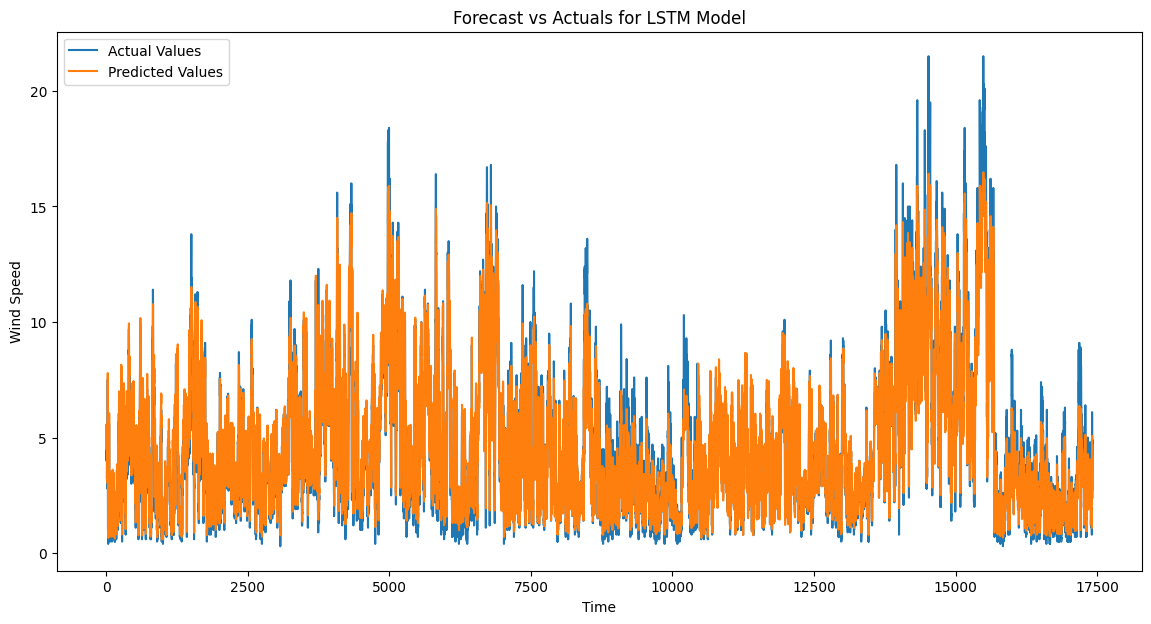

In [ ]:
import matplotlib.pyplot as plt

def plot_forecast_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(14, 7))
    plt.plot(y_true, label='Actual Values')
    plt.plot(y_pred, label='Predicted Values')
    plt.title(f'Forecast vs Actuals for {model_name} Model')
    plt.xlabel('Time')
    plt.ylabel('Wind Speed')
    plt.legend()
    plt.show()

# Plot for Prophet model
plot_forecast_vs_actual(y_true_speed_flat, y_pred_speed_flat_prophet, 'Prophet')

# Plot for ARIMA model
plot_forecast_vs_actual(y_true_speed_flat, y_pred_speed_flat_arima, 'ARIMA')

# Plot for LSTM model
plot_forecast_vs_actual(y_true_speed_flat, y_pred_speed_flat_lstm, 'LSTM')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/la03lwv3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/n3cj2754.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77436', 'data', 'file=/tmp/tmpb5zkivr5/la03lwv3.json', 'init=/tmp/tmpb5zkivr5/n3cj2754.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modell9tjfi2o/prophet_model-20240722184545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:45:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:45:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/ww3c2vks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/7v6n77qx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75027', 'data', 'file=/tmp/tmpb5zkivr5/ww3c2vks.json', 'init=/tmp/tmpb5zkivr5/7v6n77qx.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelp85y53ve/prophet_model-20240722184720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:47:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:47:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 2s 8ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/ulcnk4mt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/pzrel6hg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36553', 'data', 'file=/tmp/tmpb5zkivr5/ulcnk4mt.json', 'init=/tmp/tmpb5zkivr5/pzrel6hg.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modeln3hxqvaj/prophet_model-20240722184836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:48:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:48:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/s_xdvf_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/vywwx799.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77188', 'data', 'file=/tmp/tmpb5zkivr5/s_xdvf_w.json', 'init=/tmp/tmpb5zkivr5/vywwx799.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model9mmb6939/prophet_model-20240722184948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:49:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/kcgt6tyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/57pla1gm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89464', 'data', 'file=/tmp/tmpb5zkivr5/kcgt6tyu.json', 'init=/tmp/tmpb5zkivr5/57pla1gm.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelru6voii7/prophet_model-20240722185100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:51:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:51:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 6ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/xc0fwqjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/cqgf5n9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92174', 'data', 'file=/tmp/tmpb5zkivr5/xc0fwqjt.json', 'init=/tmp/tmpb5zkivr5/cqgf5n9j.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modeljxbtif5o/prophet_model-20240722185233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:52:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:52:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/kypltn95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/5p9g3u37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53042', 'data', 'file=/tmp/tmpb5zkivr5/kypltn95.json', 'init=/tmp/tmpb5zkivr5/5p9g3u37.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelc4h4ucna/prophet_model-20240722185406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 5ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/n8a2vfvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/m84z6lxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30882', 'data', 'file=/tmp/tmpb5zkivr5/n8a2vfvp.json', 'init=/tmp/tmpb5zkivr5/m84z6lxn.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_modelrh58h4n4/prophet_model-20240722185537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:55:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:55:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 2s 7ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/xavxtrw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/_3k7rkm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68030', 'data', 'file=/tmp/tmpb5zkivr5/xavxtrw4.json', 'init=/tmp/tmpb5zkivr5/_3k7rkm1.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model2f0xn8oh/prophet_model-20240722185648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:56:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:56:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 7ms/step


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/ya6w2k23.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5zkivr5/d5oz6uri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54671', 'data', 'file=/tmp/tmpb5zkivr5/ya6w2k23.json', 'init=/tmp/tmpb5zkivr5/d5oz6uri.json', 'output', 'file=/tmp/tmpb5zkivr5/prophet_model46di95x4/prophet_model-20240722185800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:58:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:58:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


55/55 [==============================] - 1s 7ms/step


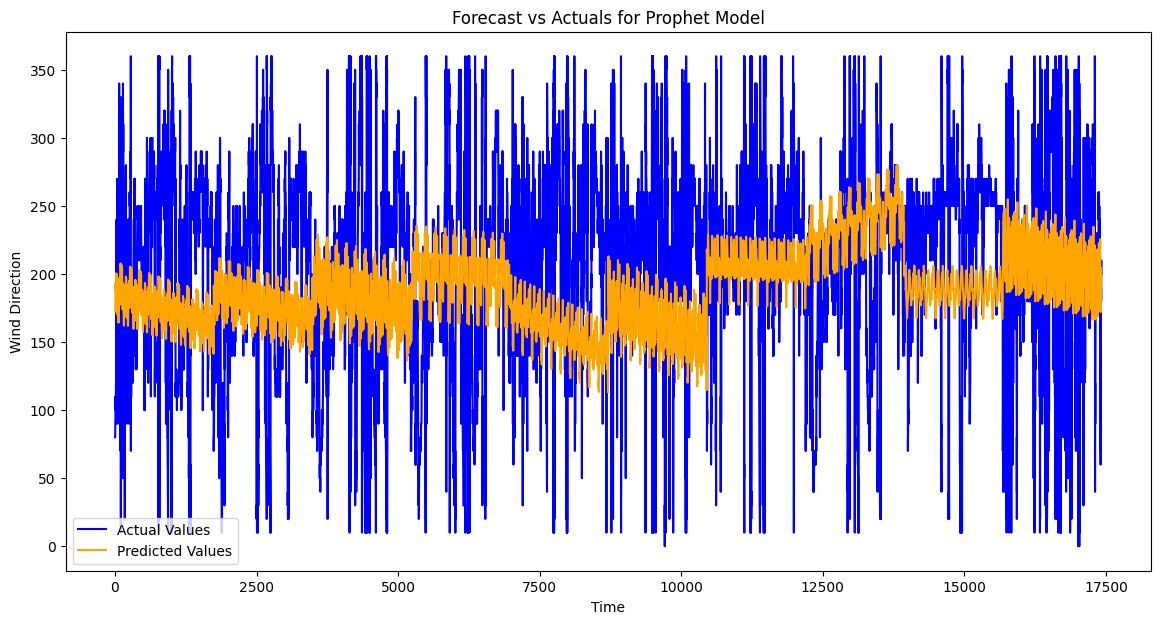

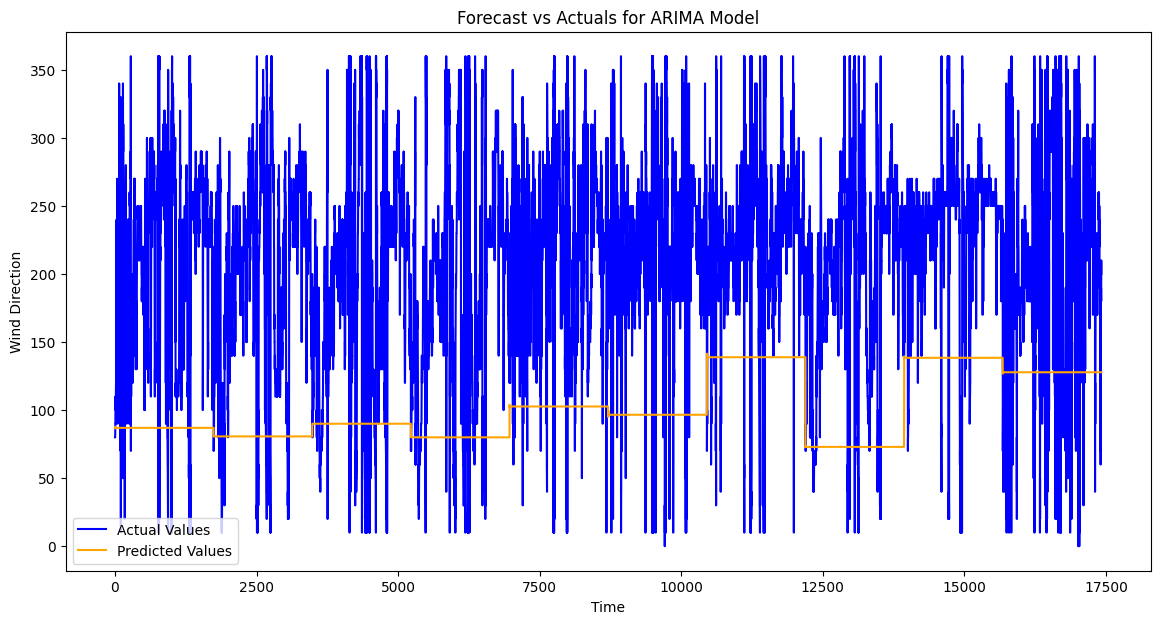

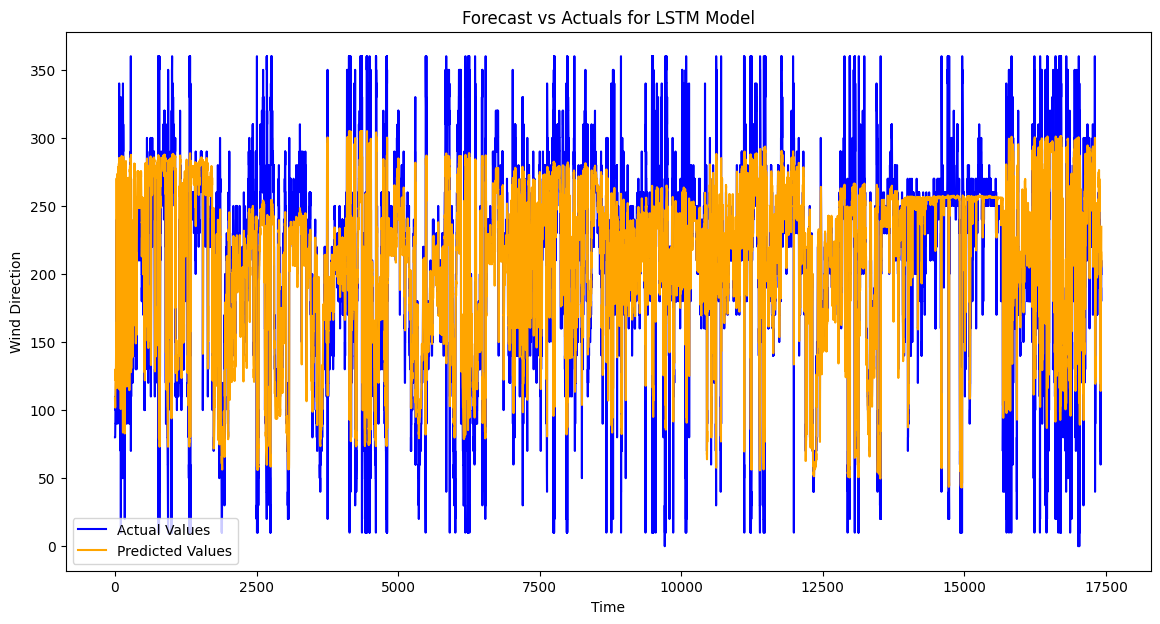

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
wind_data = xr.open_dataset("wind_2023.nc")

# Initialize lists to store predictions for EDA
y_true_direction_test = []
y_pred_direction_test_prophet = []
y_pred_direction_test_arima = []
y_pred_direction_test_lstm = []

# Function to impute NaNs with mean
def impute_with_mean(values):
    mean_value = np.nanmean(values)
    return np.nan_to_num(values, nan=mean_value)

# Function to flatten and align arrays
def flatten_and_align(y_true, y_pred):
    min_length = min(len(y_true), len(y_pred))
    return y_true[:min_length], y_pred[:min_length]

# Iterate over each station
station_ids = np.unique(wind_data['station_id'].values)

for station_id in station_ids:
    # Filter data for the current station
    station_data = wind_data.sel(station_id=station_id)
    wind_direction = station_data['measured_wind_direction'].values
    time = pd.to_datetime(station_data['time'].values)

    # Create DataFrame for wind direction
    df_direction = pd.DataFrame({
        'ds': time,
        'y': wind_direction
    })

    # Split the data into training (80%) and testing (20%) sets
    split_index = int(len(df_direction) * 0.8)
    train_direction = df_direction[:split_index]
    test_direction = df_direction[split_index:]

    # Prophet model
    model_prophet_direction = Prophet()
    model_prophet_direction.fit(train_direction)
    future_direction = model_prophet_direction.make_future_dataframe(periods=len(test_direction), freq='H')
    forecast_prophet_direction = model_prophet_direction.predict(future_direction)
    y_pred_direction_prophet = forecast_prophet_direction.set_index('ds')['yhat'].reindex(test_direction['ds']).values

    # ARIMA model
    model_arima_direction = ARIMA(train_direction['y'], order=(5, 1, 0))
    model_arima_direction_fit = model_arima_direction.fit()
    y_pred_direction_arima = model_arima_direction_fit.forecast(steps=len(test_direction))
    y_pred_direction_arima = np.array(y_pred_direction_arima)

    # LSTM model
    def create_lstm_dataset(X, time_step=1):
        Xs = []
        for i in range(len(X) - time_step):
            v = X[i:(i + time_step)]
            Xs.append(v)
        return np.array(Xs)

    time_step = 10
    train_direction_lstm = train_direction['y'].values
    test_direction_lstm = test_direction['y'].values
    train_direction_lstm = impute_with_mean(train_direction_lstm)
    test_direction_lstm = impute_with_mean(test_direction_lstm)

    train_direction_lstm_X = create_lstm_dataset(train_direction_lstm, time_step)
    test_direction_lstm_X = create_lstm_dataset(test_direction_lstm, time_step)

    train_direction_lstm_Y = train_direction_lstm[time_step:]
    test_direction_lstm_Y = test_direction_lstm[time_step:]

    model_lstm_direction = Sequential()
    model_lstm_direction.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model_lstm_direction.add(LSTM(50, return_sequences=False))
    model_lstm_direction.add(Dense(25))
    model_lstm_direction.add(Dense(1))

    model_lstm_direction.compile(optimizer='adam', loss='mean_squared_error')
    model_lstm_direction.fit(train_direction_lstm_X, train_direction_lstm_Y, batch_size=1, epochs=1)

    y_pred_direction_lstm = model_lstm_direction.predict(test_direction_lstm_X)

    # Align and flatten arrays
    y_true_direction = test_direction.set_index('ds')['y'].values[time_step:]
    y_true_direction = impute_with_mean(y_true_direction)

    y_true_direction, y_pred_direction_prophet = flatten_and_align(y_true_direction, y_pred_direction_prophet[time_step:])
    y_true_direction, y_pred_direction_arima = flatten_and_align(y_true_direction, y_pred_direction_arima)
    y_true_direction, y_pred_direction_lstm = flatten_and_align(y_true_direction, y_pred_direction_lstm.flatten())

    y_true_direction_test.append(y_true_direction)
    y_pred_direction_test_prophet.append(y_pred_direction_prophet)
    y_pred_direction_test_arima.append(y_pred_direction_arima)
    y_pred_direction_test_lstm.append(y_pred_direction_lstm)

# Flatten lists for evaluation
if y_true_direction_test and y_pred_direction_test_prophet and y_pred_direction_test_arima and y_pred_direction_test_lstm:
    y_true_direction_flat = np.concatenate(y_true_direction_test)
    y_pred_direction_flat_prophet = np.concatenate(y_pred_direction_test_prophet)
    y_pred_direction_flat_arima = np.concatenate(y_pred_direction_test_arima)
    y_pred_direction_flat_lstm = np.concatenate(y_pred_direction_test_lstm)

    # Plot for Prophet model
    plot_forecast_vs_actual(y_true_direction_flat, y_pred_direction_flat_prophet, 'Prophet')

    # Plot for ARIMA model
    plot_forecast_vs_actual(y_true_direction_flat, y_pred_direction_flat_arima, 'ARIMA')

    # Plot for LSTM model
    plot_forecast_vs_actual(y_true_direction_flat, y_pred_direction_flat_lstm, 'LSTM')

else:
    print("One or more lists are empty. Ensure predictions are collected correctly.")
